In [2]:
import numpy as np
from astropy.io import fits
import lime 
import matplotlib.pyplot as plt

MASK 1

In [2]:
hdul1 = fits.open('../../../reduccion/NGC1313/espectros_oficiales/slit1_1D.fits', mode='update')
header1 = hdul1[0].header
#header['BUNIT'] = '1e-15 erg / (Angstrom s cm2)'
header1['FLUXSCAL'] = 1
header1

hdul1.flush()

In [3]:
print(header1)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    1 / Number of axes                                 NAXIS1  =                 2234 / Axis length                                    EXTEND  =                    F / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        OBJECT  = 'NGC1313-MSK01 2D CON LACOS' / Name of the object observed            DATE    = '2024-11-08T15:52:40' / Date FITS file was generated                  IRAF-TLM= '2024-11-08T15:52:40' / Time of last modification                     FIXPIX  = 'Jun 14 10:25 Bad pixel file is tmpbpm894khg.pl'                      CTYPE1  = 'LINEAR  '           / R.A. in tangent plane projection               CRPIX1  =                   1. / Ref pix of axis 1                              CRVAL1  =     4024.00463867188 / RA at R

In [3]:
def import_1313_fits(file_address, ext=0):

    #open the fits file
    with fits.open(file_address) as hdul:
        data, header = hdul[ext].data, hdul[ext].header

    #reconstruct the wavelength array from the header data
    w_min, dw, n_pix = header["CRVAL1"], header["CD1_1"], header["NAXIS1"]
    w_max = w_min + dw * n_pix
    wavelength = np.linspace(w_min, w_max, n_pix, endpoint=False)

    return wavelength, data, header

In [6]:
#now we specify the location and load the data
#address of NGC1313 spectrum (in this case, here)
fits_file1 = '../../../reduccion/NGC1313/espectros_oficiales/slit1_1D.fits'

#load the data
wave1, flux1, hdr1 = import_1313_fits(fits_file1)

In [4]:
# Galaxy redshift and the flux normalization
z_obj = 0.001568
normFlux = 1

In [8]:
spec1 = lime.Spectrum(wave1, flux1, redshift=z_obj, norm_flux=normFlux, units_flux='1e-15 * FLAM')

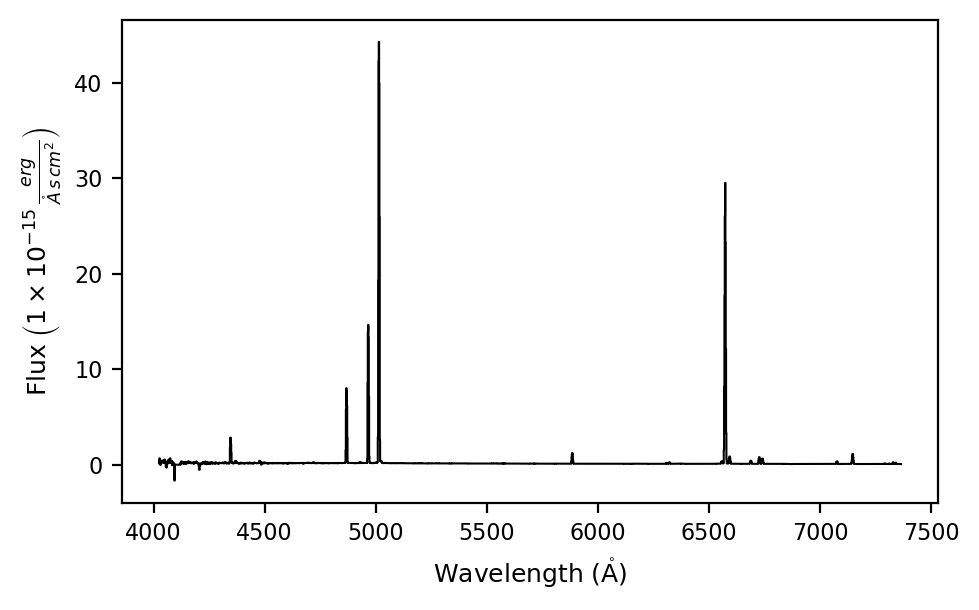

In [9]:
spec1.plot.spectrum(label='slit1_mask1_NGC1313')

In [10]:
# Line name, its location mask in the rest _frame and fit configuration
line1_Ha = 'H1_6563A_b'
band_edges1_Ha = np.array([6438.03, 6508.66, 6535.10, 6600.95, 6627.70, 6661.82])
fit_conf1_Ha = {'H1_6563A_b': 'H1_6563A+N2_6584A+N2_6548A',
            'N2_6548A_amp': {'expr': 'N2_6584A_amp/2.94'},
            'N2_6548A_kinem': 'N2_6584A'}

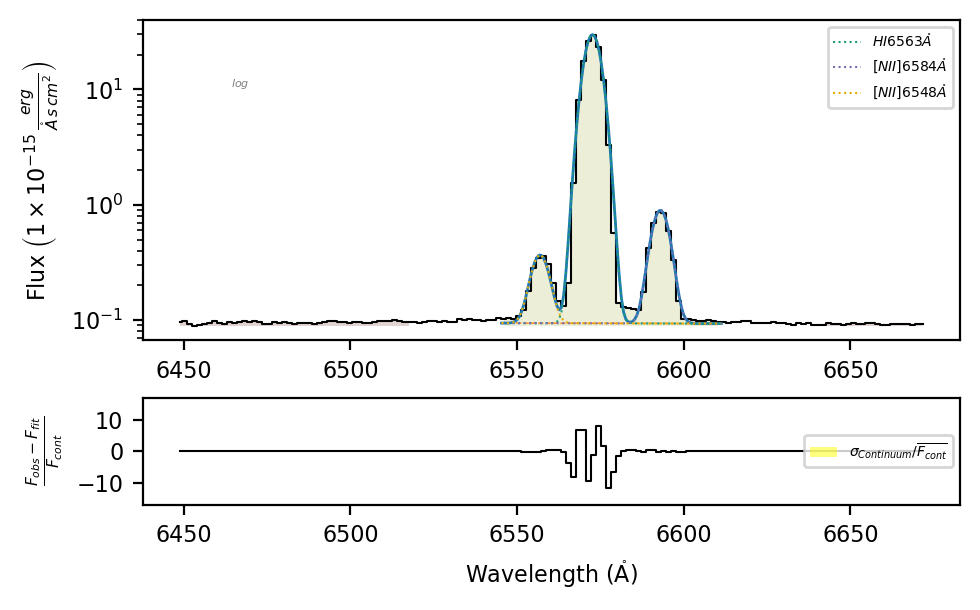

In [11]:
# New attempt including the fit configuration
spec1.fit.bands(line1_Ha, band_edges1_Ha, fit_conf=fit_conf1_Ha)
spec1.plot.bands()

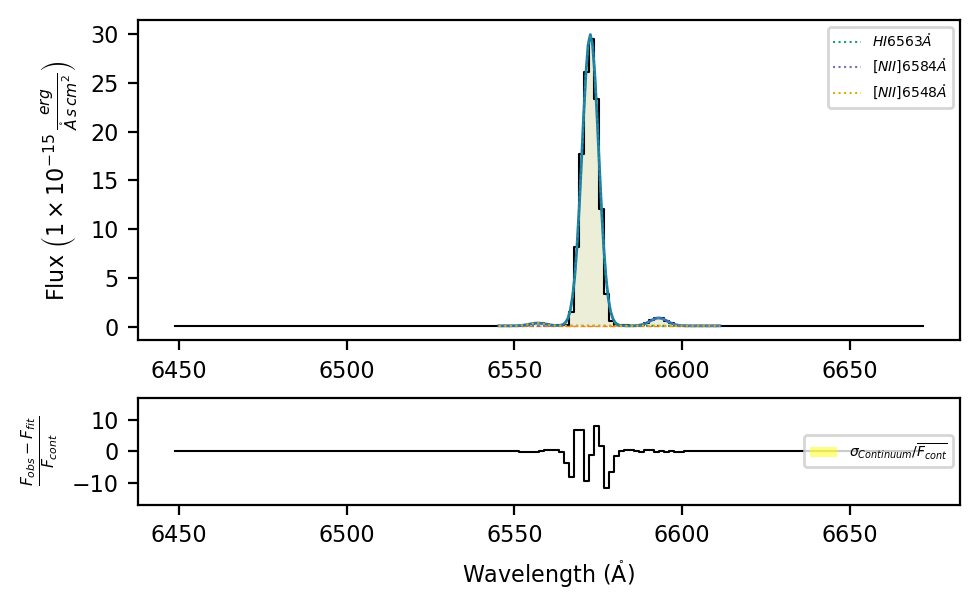

In [12]:
# New attempt including the fit configuration
spec1.fit.bands(line1_Ha, band_edges1_Ha, fit_conf=fit_conf1_Ha)
spec1.plot.bands(y_scale='linear')

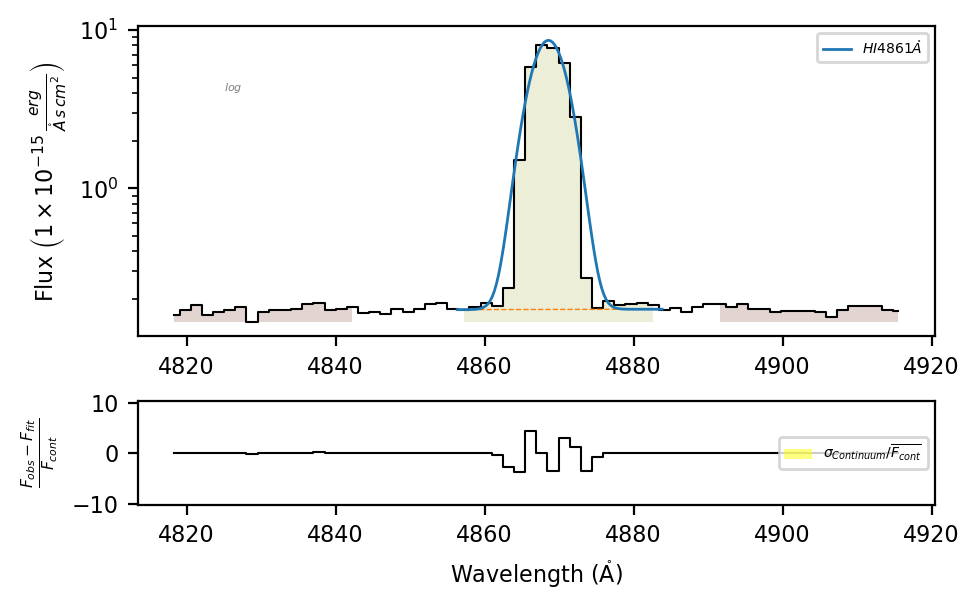

In [13]:
spec1.fit.bands('H1_4861A')
spec1.plot.bands()

In [14]:
spec1.fit.frame

<bound method SpecTreatment.frame of <lime.workflow.SpecTreatment object at 0x12d13e8d0>>

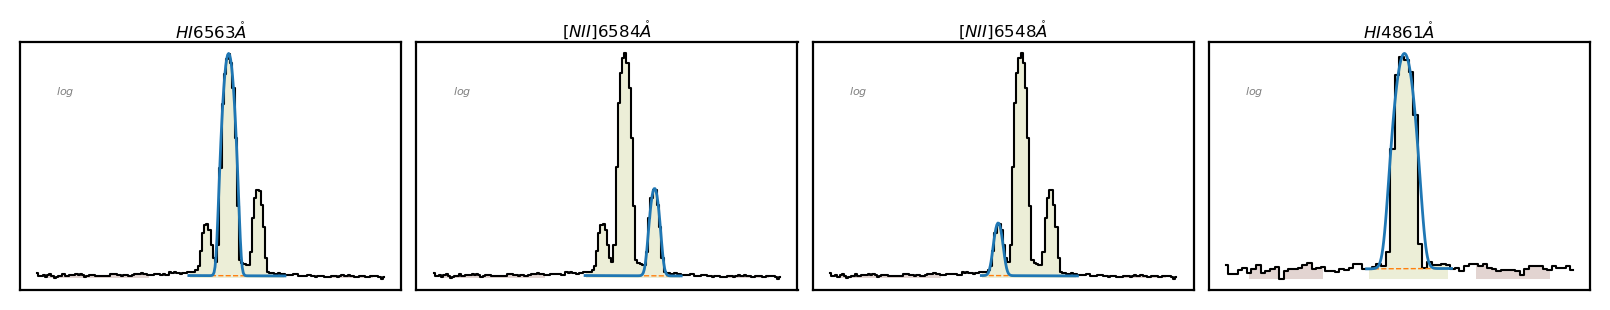

In [15]:
spec1.plot.grid()

In [16]:
spec1.save_frame('slit1_Hae_Hb.txt')

SLIT 3

In [17]:
hdul3 = fits.open('../../../reduccion/NGC1313/espectros_oficiales/slit3_1D.fits', mode='update')
header3 = hdul3[0].header
#header['BUNIT'] = '1e-15 erg / (Angstrom s cm2)'
header3['FLUXSCAL'] = 1
header3

hdul3.flush()

In [18]:
print(header3)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    1 / Number of axes                                 NAXIS1  =                 2225 / Axis length                                    EXTEND  =                    F / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        OBJECT  = 'NGC1313-MSK01 2D CON LACOS' / Name of the object observed            DATE    = '2024-11-08T15:52:50' / Date FITS file was generated                  IRAF-TLM= '2024-11-08T15:52:50' / Time of last modification                     FIXPIX  = 'Jun 14 10:25 Bad pixel file is tmpbpm894khg.pl'                      CTYPE1  = 'LINEAR  '           / R.A. in tangent plane projection               CRPIX1  =                   1. / Ref pix of axis 1                              CRVAL1  =     4024.88818359375 / RA at R

In [19]:
#now we specify the location and load the data
#address of NGC1313 spectrum (in this case, here)
fits_file3 = '../../../reduccion/NGC1313/espectros_oficiales/slit3_1D.fits'

#load the data
wave3, flux3, hdr3 = import_1313_fits(fits_file3)

In [20]:
spec3 = lime.Spectrum(wave3, flux3, redshift=z_obj, norm_flux=normFlux, units_flux='1e-15 * FLAM')

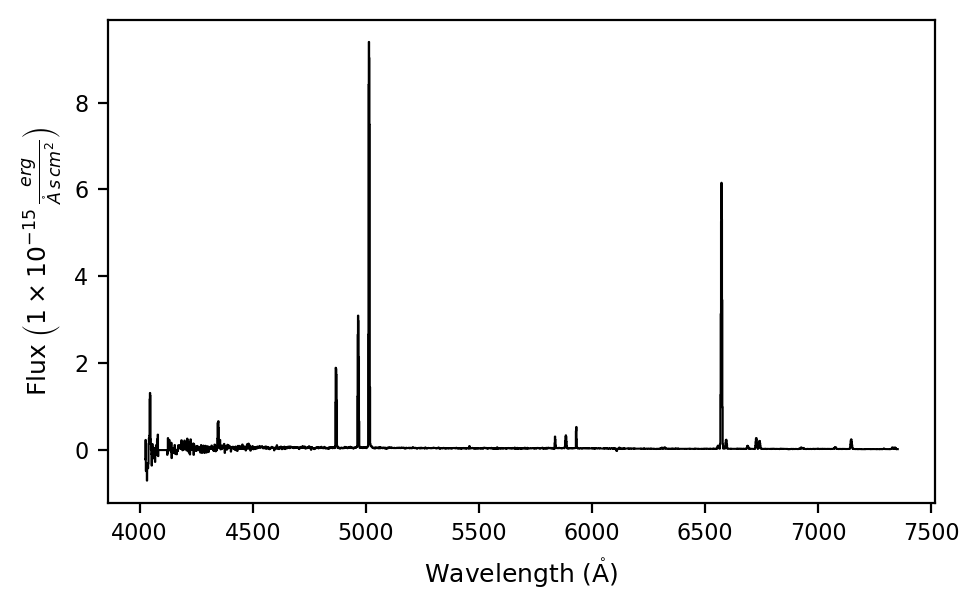

In [21]:
spec3.plot.spectrum(label='slit3_mask1_NGC1313')

In [22]:
# Line name, its location mask in the rest _frame and fit configuration
line3_Ha = 'H1_6563A_b'
band_edges3_Ha = np.array([6438.03, 6508.66, 6535.10, 6600.95, 6627.70, 6661.82])
fit_conf3_Ha = {'H1_6563A_b': 'H1_6563A+N2_6584A+N2_6548A',
            'N2_6548A_amp': {'expr': 'N2_6584A_amp/2.94'},
            'N2_6548A_kinem': 'N2_6584A'}

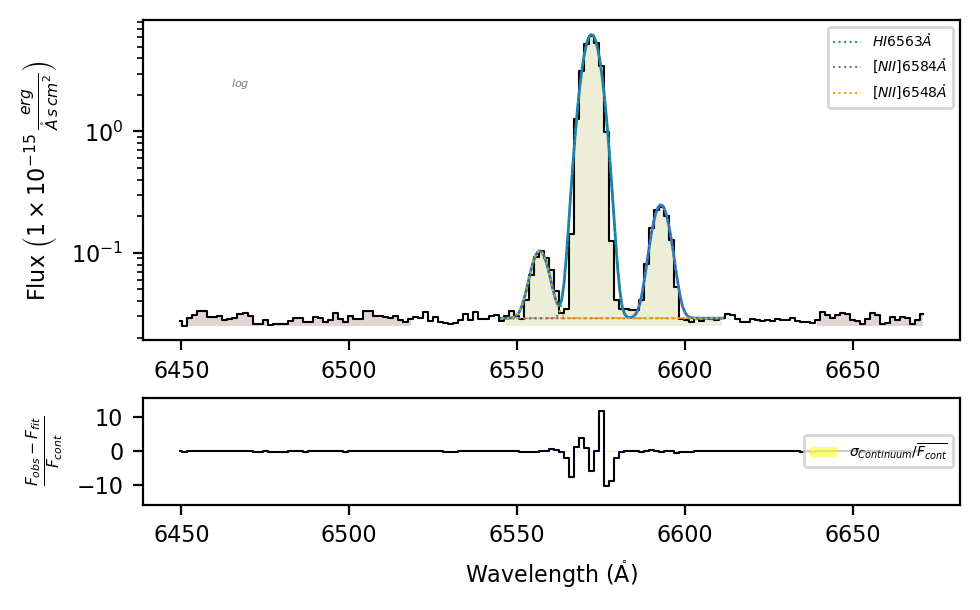

In [23]:
# New attempt including the fit configuration
spec3.fit.bands(line3_Ha, band_edges3_Ha, fit_conf=fit_conf3_Ha)
spec3.plot.bands()

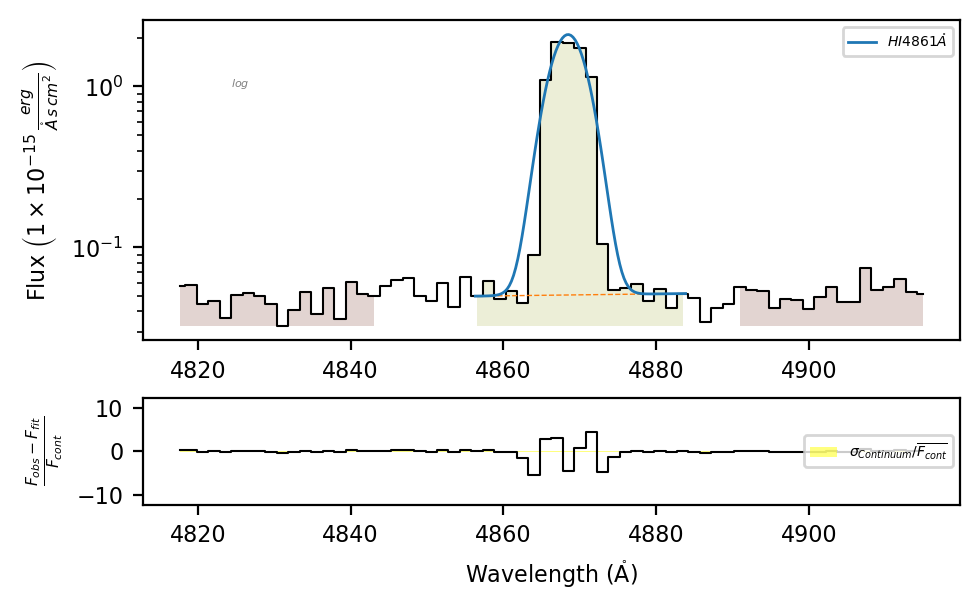

In [24]:
spec3.fit.bands('H1_4861A')
spec3.plot.bands()

In [25]:
spec3.fit.frame

<bound method SpecTreatment.frame of <lime.workflow.SpecTreatment object at 0x1319bf140>>

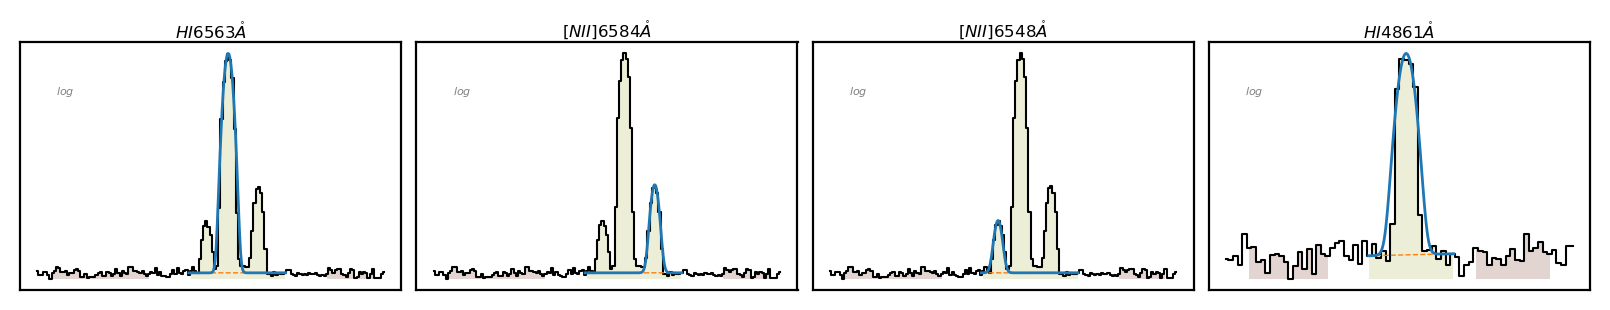

In [26]:
spec3.plot.grid()

In [27]:
spec3.save_frame('slit3_Hae_Hb.txt')

SLIT 7

In [28]:
hdul7 = fits.open('../../../reduccion/NGC1313/espectros_oficiales/slit7_1D.fits', mode='update')
header7 = hdul7[0].header
#header['BUNIT'] = '1e-15 erg / (Angstrom s cm2)'
header7['FLUXSCAL'] = 1
header7

hdul7.flush()

In [29]:
print(header7)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    1 / Number of axes                                 NAXIS1  =                 2178 / Axis length                                    EXTEND  =                    F / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        OBJECT  = 'NGC1313-MSK01 2D CON LACOS' / Name of the object observed            DATE    = '2024-11-08T15:52:57' / Date FITS file was generated                  IRAF-TLM= '2024-11-08T15:52:57' / Time of last modification                     FIXPIX  = 'Jun 14 10:25 Bad pixel file is tmpbpm894khg.pl'                      CTYPE1  = 'LINEAR  '           / R.A. in tangent plane projection               CRPIX1  =                   1. / Ref pix of axis 1                              CRVAL1  =      4021.7333984375 / RA at R

In [30]:
#now we specify the location and load the data
#address of NGC1313 spectrum (in this case, here)
fits_file7 = '../../../reduccion/NGC1313/espectros_oficiales/slit7_1D.fits'

#load the data
wave7, flux7, hdr7 = import_1313_fits(fits_file7)

In [31]:
spec7 = lime.Spectrum(wave7, flux7, redshift=z_obj, norm_flux=normFlux, units_flux='1e-15 * FLAM')

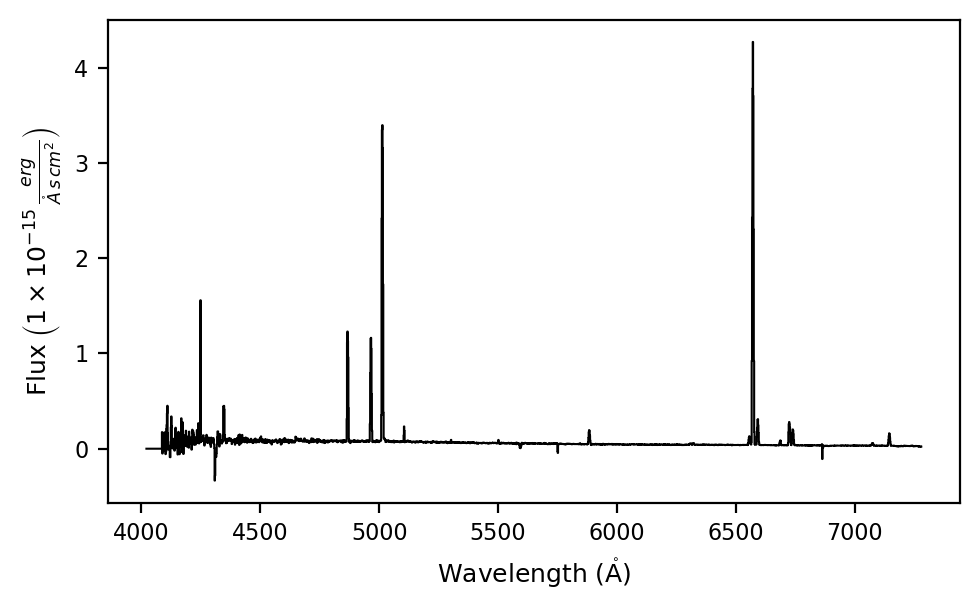

In [32]:
spec7.plot.spectrum(label='slit7_mask1_NGC1313')

In [33]:
# Line name, its location mask in the rest _frame and fit configuration
line7_Ha = 'H1_6563A_b'
band_edges7_Ha = np.array([6438.03, 6508.66, 6535.10, 6600.95, 6627.70, 6661.82])
fit_conf7_Ha = {'H1_6563A_b': 'H1_6563A+N2_6584A+N2_6548A',
            'N2_6548A_amp': {'expr': 'N2_6584A_amp/2.94'},
            'N2_6548A_kinem': 'N2_6584A'}

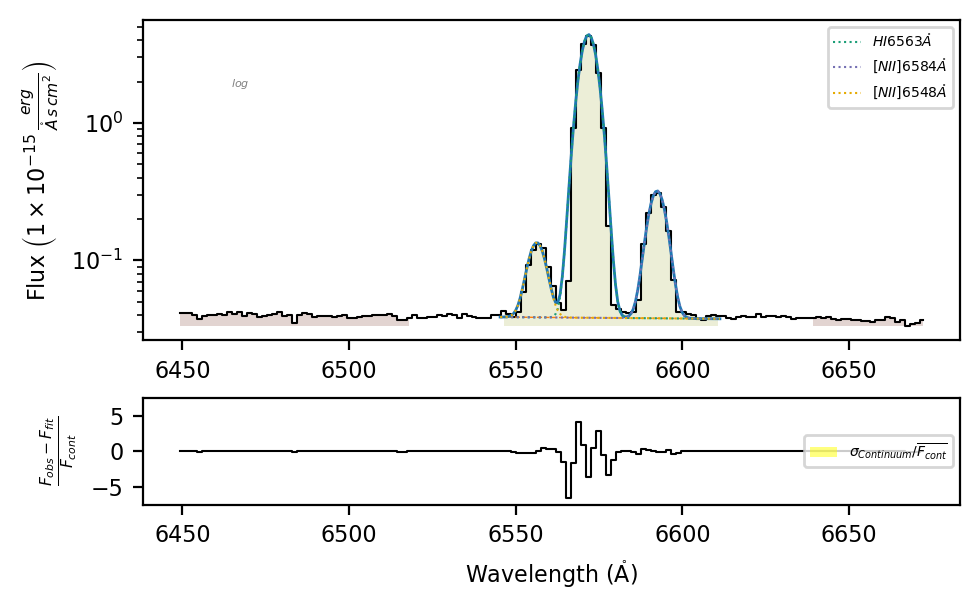

In [34]:
# New attempt including the fit configuration
spec7.fit.bands(line7_Ha, band_edges7_Ha, fit_conf=fit_conf7_Ha)
spec7.plot.bands()

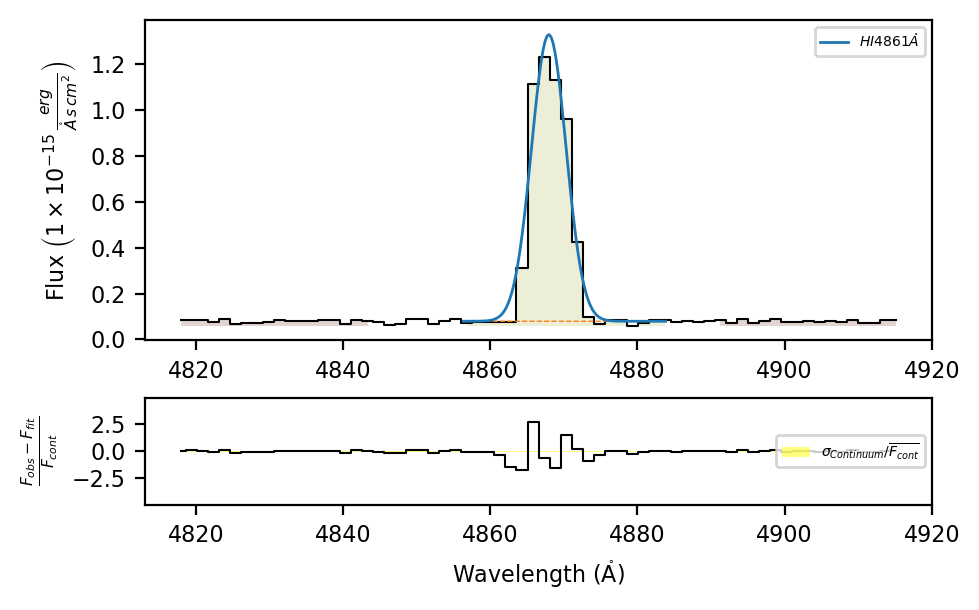

In [35]:
spec7.fit.bands('H1_4861A')
spec7.plot.bands()

In [36]:
spec7.fit.frame

<bound method SpecTreatment.frame of <lime.workflow.SpecTreatment object at 0x131766300>>

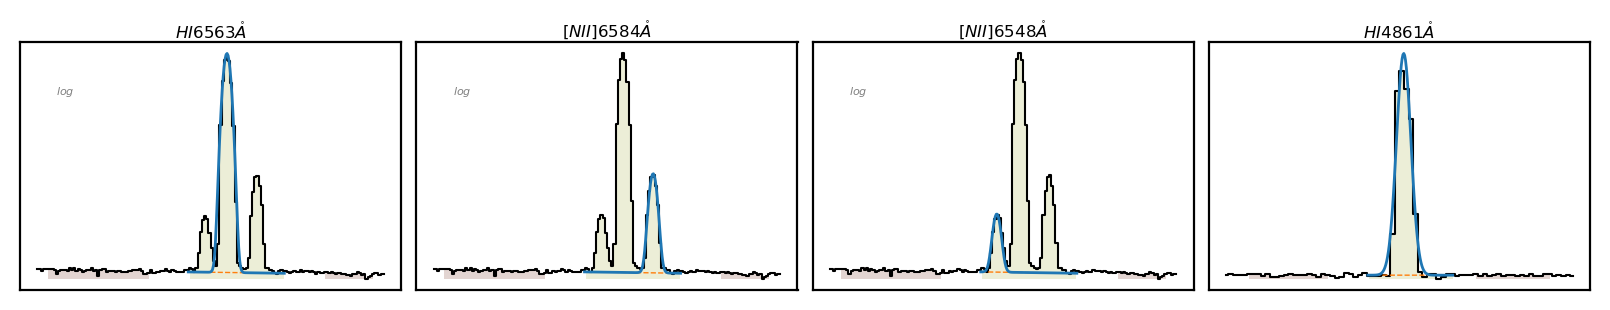

In [37]:
spec7.plot.grid()

In [38]:
spec7.save_frame('slit7_Hae_Hb.txt')

SLIT 9

In [39]:
hdul9 = fits.open('../../../reduccion/NGC1313/espectros_oficiales/slit9_1D.fits', mode='update')
header9 = hdul9[0].header
#header['BUNIT'] = '1e-15 erg / (Angstrom s cm2)'
header9['FLUXSCAL'] = 1
header9

hdul9.flush()

In [40]:
print(header9)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    1 / Number of axes                                 NAXIS1  =                 2807 / Axis length                                    EXTEND  =                    F / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        OBJECT  = 'NGC1313-MSK01 2D CON LACOS' / Name of the object observed            DATE    = '2024-11-08T15:53:06' / Date FITS file was generated                  IRAF-TLM= '2024-11-08T15:53:06' / Time of last modification                     FIXPIX  = 'Jun 14 10:25 Bad pixel file is tmpbpm894khg.pl'                      CTYPE1  = 'LINEAR  '           / R.A. in tangent plane projection               CRPIX1  =                   1. / Ref pix of axis 1                              CRVAL1  =     4035.11450195312 / RA at R

In [41]:
#now we specify the location and load the data
#address of NGC1313 spectrum (in this case, here)
fits_file9 = '../../../reduccion/NGC1313/espectros_oficiales/slit9_1D.fits'

#load the data
wave9, flux9, hdr9 = import_1313_fits(fits_file9)

In [42]:
spec9 = lime.Spectrum(wave9, flux9, redshift=z_obj, norm_flux=normFlux, units_flux='1e-15 * FLAM')

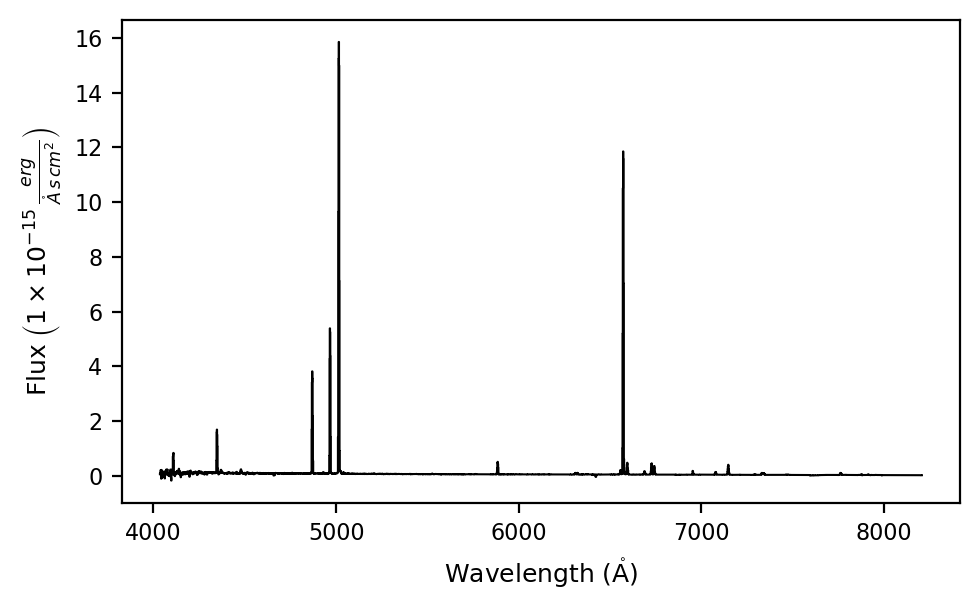

In [43]:
spec9.plot.spectrum(label='slit9_mask1_NGC1313')

In [44]:
# Line name, its location mask in the rest _frame and fit configuration
line9_Ha = 'H1_6563A_b'
band_edges9_Ha = np.array([6438.03, 6508.66, 6535.10, 6600.95, 6627.70, 6661.82])
fit_conf9_Ha = {'H1_6563A_b': 'H1_6563A+N2_6584A+N2_6548A',
            'N2_6548A_amp': {'expr': 'N2_6584A_amp/2.94'},
            'N2_6548A_kinem': 'N2_6584A'}

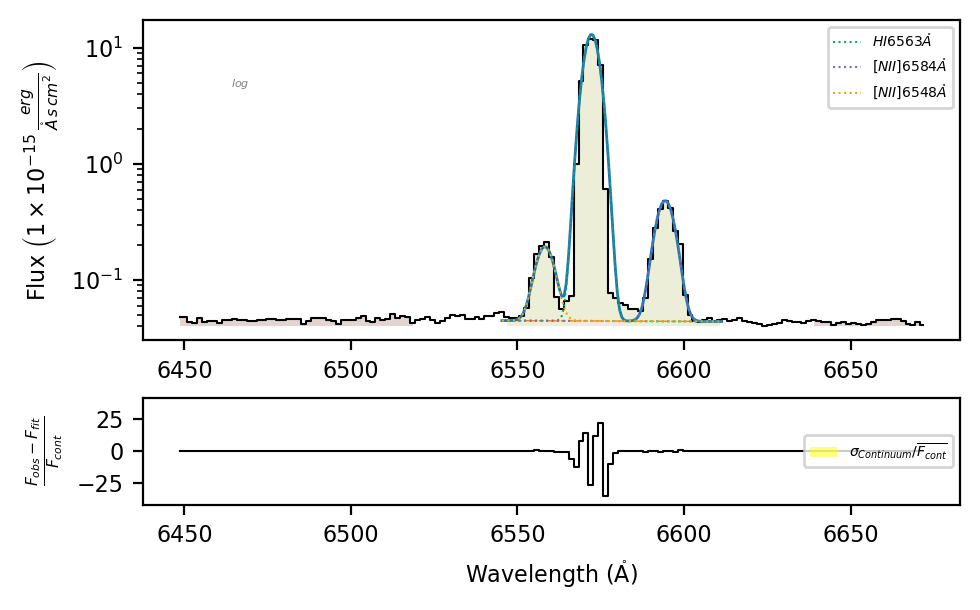

In [45]:
# New attempt including the fit configuration
spec9.fit.bands(line9_Ha, band_edges9_Ha, fit_conf=fit_conf9_Ha)
spec9.plot.bands()

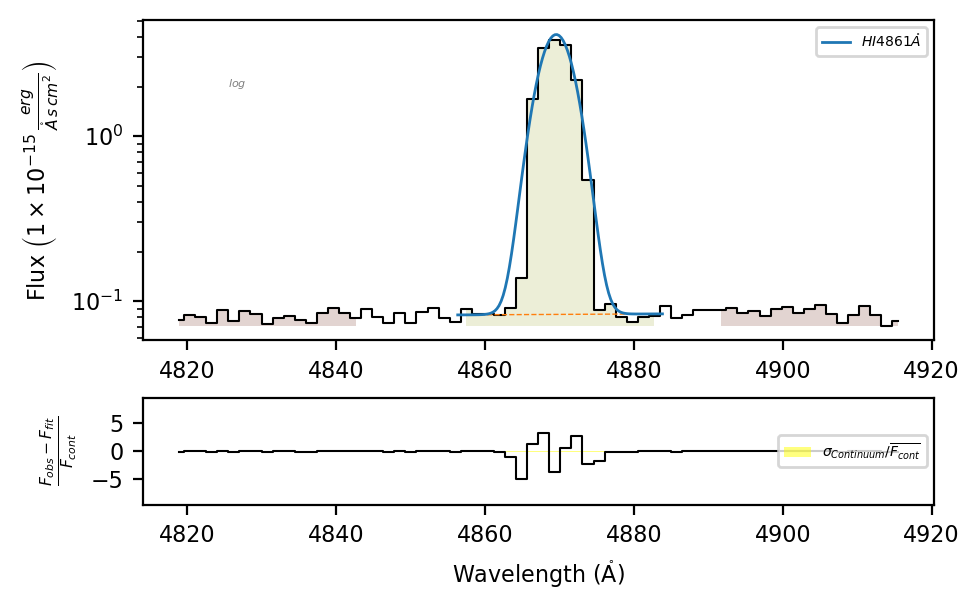

In [46]:
spec9.fit.bands('H1_4861A')
spec9.plot.bands()

In [47]:
spec9.fit.frame

<bound method SpecTreatment.frame of <lime.workflow.SpecTreatment object at 0x134da2f60>>

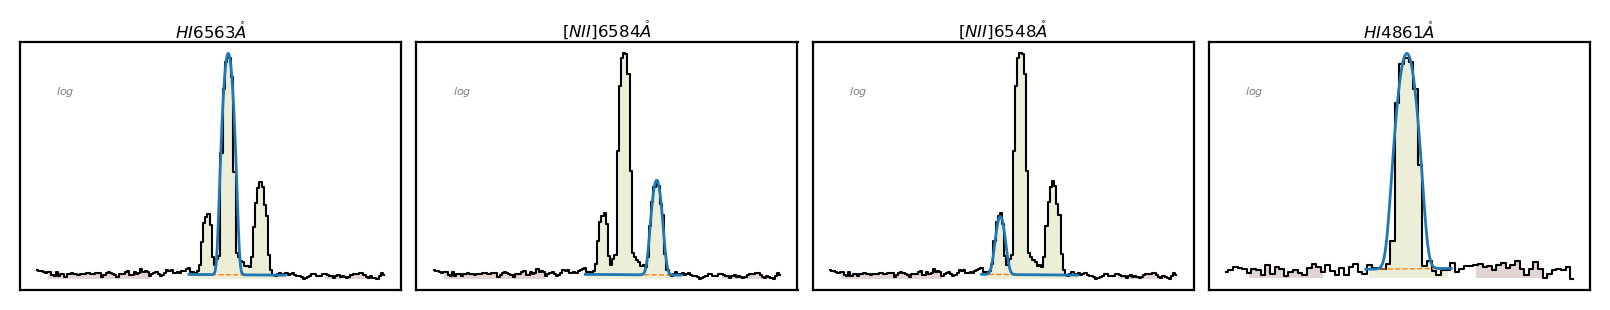

In [48]:
spec9.plot.grid()

In [49]:
spec9.save_frame('slit9_Hae_Hb.txt')

SLIT 11

In [50]:
hdul11 = fits.open('../../../reduccion/NGC1313/espectros_oficiales/slit11_1D.fits', mode='update')
header11 = hdul11[0].header
#header['BUNIT'] = '1e-15 erg / (Angstrom s cm2)'
header11['FLUXSCAL'] = 1
header11

hdul11.flush()

In [51]:
print(header11)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    1 / Number of axes                                 NAXIS1  =                 2789 / Axis length                                    EXTEND  =                    F / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        OBJECT  = 'NGC1313-MSK01 2D CON LACOS' / Name of the object observed            DATE    = '2024-11-08T15:53:13' / Date FITS file was generated                  IRAF-TLM= '2024-11-08T15:53:13' / Time of last modification                     FIXPIX  = 'Jun 14 10:25 Bad pixel file is tmpbpm894khg.pl'                      CTYPE1  = 'LINEAR  '           / R.A. in tangent plane projection               CRPIX1  =                   1. / Ref pix of axis 1                              CRVAL1  =     4035.43627929687 / RA at R

In [52]:
#now we specify the location and load the data
#address of NGC1313 spectrum (in this case, here)
fits_file11 = '../../../reduccion/NGC1313/espectros_oficiales/slit11_1D.fits'

#load the data
wave11, flux11, hdr11 = import_1313_fits(fits_file11)

In [53]:
spec11 = lime.Spectrum(wave11, flux11, redshift=z_obj, norm_flux=normFlux, units_flux='1e-15 * FLAM')

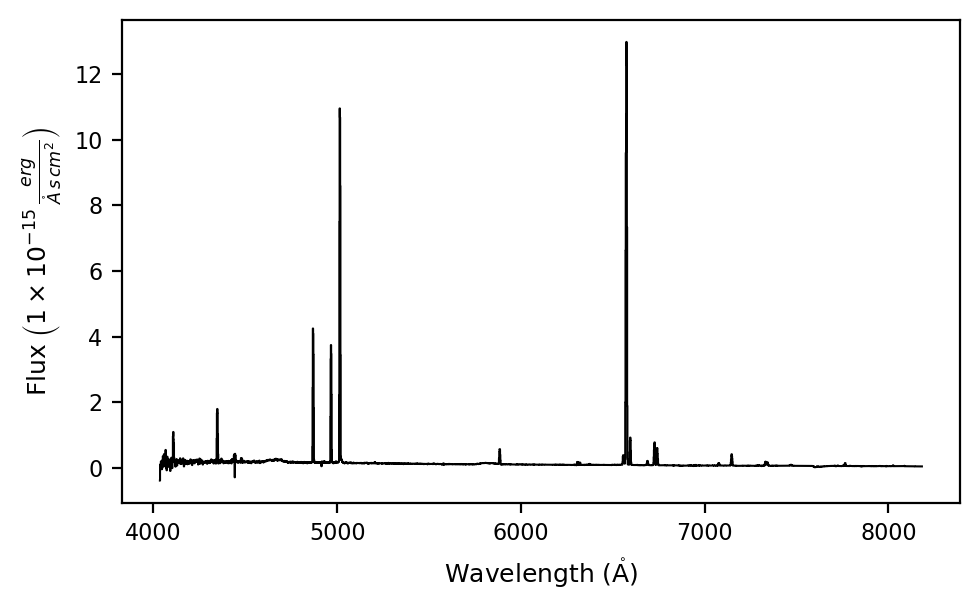

In [54]:
spec11.plot.spectrum(label='slit11_mask1_NGC1313')

In [55]:
# Line name, its location mask in the rest _frame and fit configuration
line11_Ha = 'H1_6563A_b'
band_edges11_Ha = np.array([6438.03, 6508.66, 6535.10, 6600.95, 6627.70, 6661.82])
fit_conf11_Ha = {'H1_6563A_b': 'H1_6563A+N2_6584A+N2_6548A',
            'N2_6548A_amp': {'expr': 'N2_6584A_amp/2.94'},
            'N2_6548A_kinem': 'N2_6584A'}

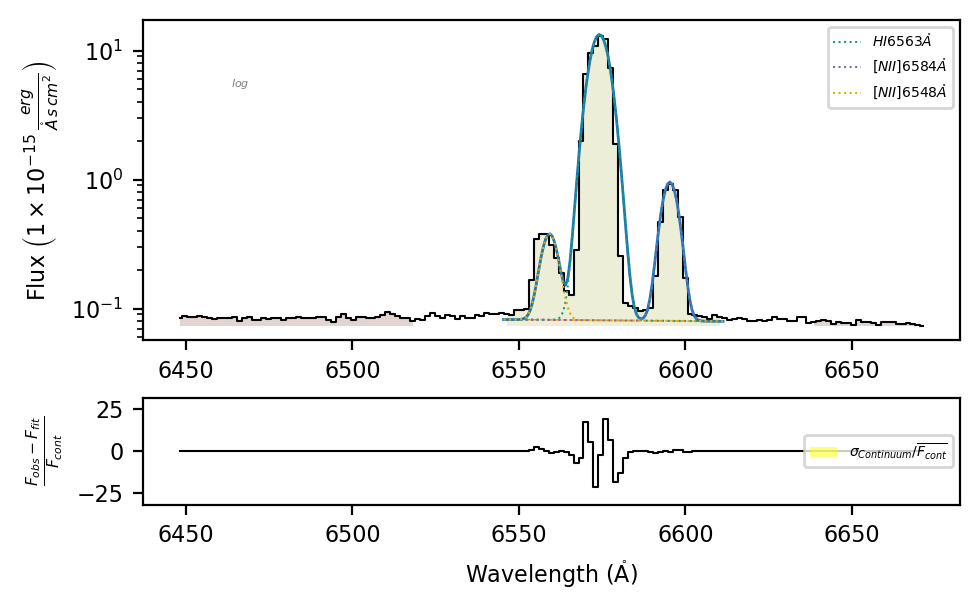

In [56]:
# New attempt including the fit configuration
spec11.fit.bands(line11_Ha, band_edges11_Ha, fit_conf=fit_conf11_Ha)
spec11.plot.bands()

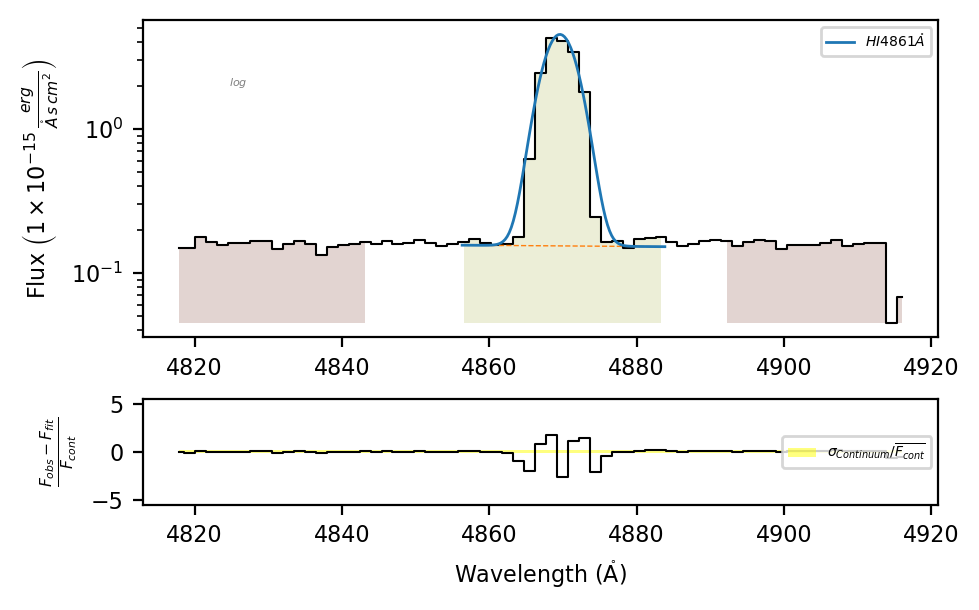

In [57]:
spec11.fit.bands('H1_4861A')
spec11.plot.bands()

In [58]:
# Line name and its location mask in the rest _frame
line11_Hb = 'H1_4861A'
#band_edges = np.array([4809.80, 4836.10, 4848.715437, 4876.181741, 4883.13, 4908.40])
band_edges11_Hb = np.array([4809.80, 4836.10, 4848.715437, 4876.181741, 4883.13, 4902.40])

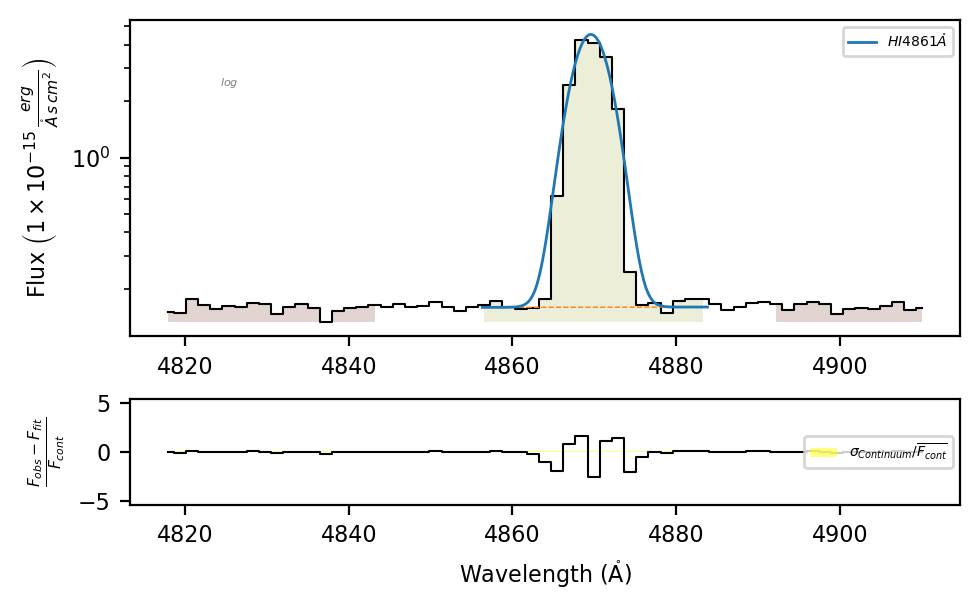

In [59]:
# Run the fitting and plot it
spec11.fit.bands(line11_Hb, band_edges11_Hb)
spec11.plot.bands()

In [60]:
spec11.fit.frame

<bound method SpecTreatment.frame of <lime.workflow.SpecTreatment object at 0x133677ad0>>

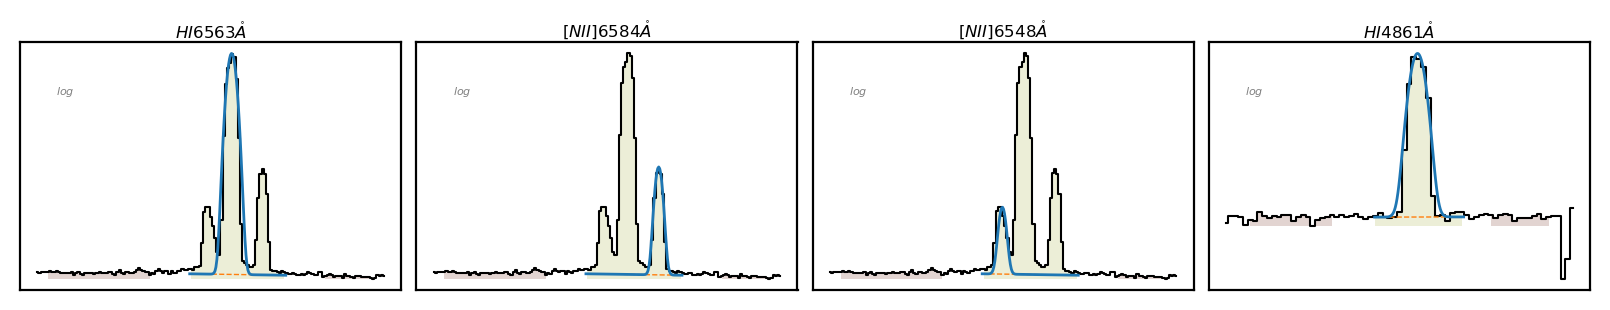

In [61]:
spec11.plot.grid()

In [62]:
spec11.save_frame('slit11_Hae_Hb.txt')

SLIT 13

In [63]:
hdul13 = fits.open('../../../reduccion/NGC1313/espectros_oficiales/slit13_1D.fits', mode='update')
header13 = hdul13[0].header
#header['BUNIT'] = '1e-15 erg / (Angstrom s cm2)'
header13['FLUXSCAL'] = 1
header13

hdul13.flush()

In [64]:
print(header13)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    1 / Number of axes                                 NAXIS1  =                 2519 / Axis length                                    EXTEND  =                    F / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        OBJECT  = 'NGC1313-MSK01 2D CON LACOS' / Name of the object observed            DATE    = '2024-11-08T15:53:23' / Date FITS file was generated                  IRAF-TLM= '2024-11-08T15:53:23' / Time of last modification                     FIXPIX  = 'Jun 14 10:25 Bad pixel file is tmpbpm894khg.pl'                      CTYPE1  = 'LINEAR  '           / R.A. in tangent plane projection               CRPIX1  =                   1. / Ref pix of axis 1                              CRVAL1  =       4035.560546875 / RA at R

In [65]:
#now we specify the location and load the data
#address of NGC1313 spectrum (in this case, here)
fits_file13 = '../../../reduccion/NGC1313/espectros_oficiales/slit13_1D.fits'

#load the data
wave13, flux13, hdr13 = import_1313_fits(fits_file13)

In [66]:
spec13 = lime.Spectrum(wave13, flux13, redshift=z_obj, norm_flux=normFlux, units_flux='1e-15 * FLAM')

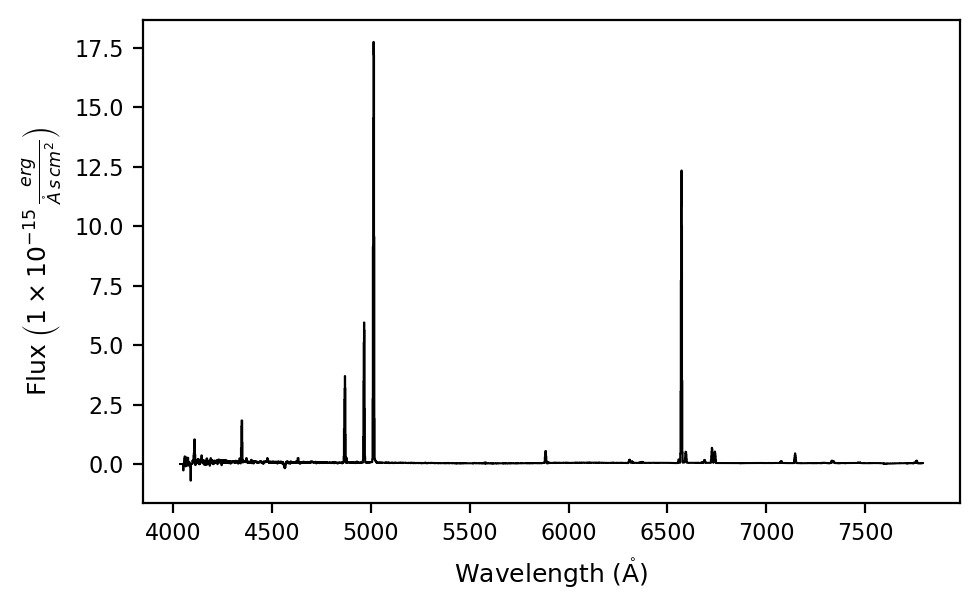

In [67]:
spec13.plot.spectrum(label='slit13_mask1_NGC1313')

In [68]:
# Line name, its location mask in the rest _frame and fit configuration
line13_Ha = 'H1_6563A_b'
band_edges13_Ha = np.array([6438.03, 6508.66, 6535.10, 6600.95, 6627.70, 6661.82])
fit_conf13_Ha = {'H1_6563A_b': 'H1_6563A+N2_6584A+N2_6548A',
            'N2_6548A_amp': {'expr': 'N2_6584A_amp/2.94'},
            'N2_6548A_kinem': 'N2_6584A'}

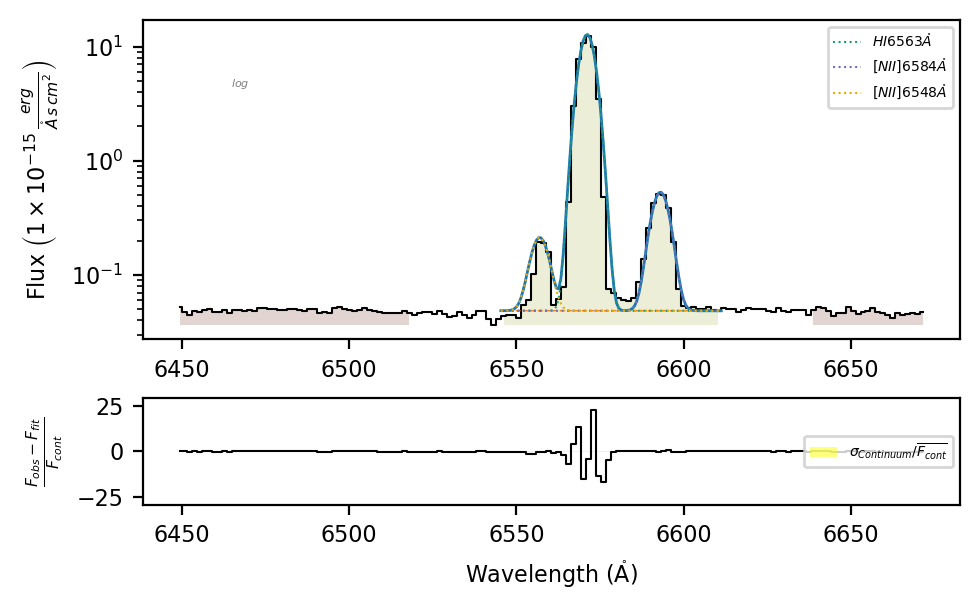

In [69]:
# New attempt including the fit configuration
spec13.fit.bands(line13_Ha, band_edges13_Ha, fit_conf=fit_conf13_Ha)
spec13.plot.bands()

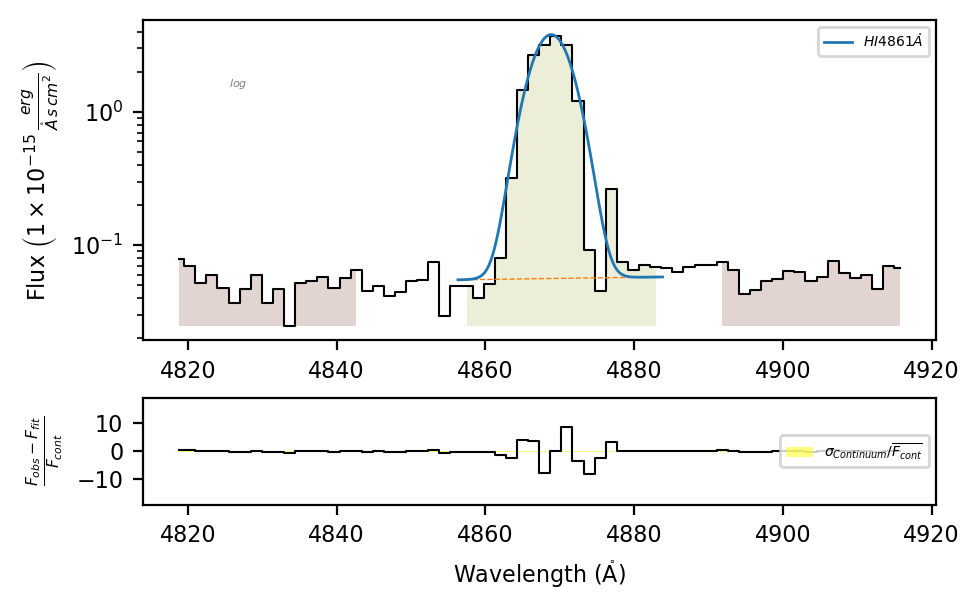

In [70]:
spec13.fit.bands('H1_4861A')
spec13.plot.bands()

In [71]:
spec13.fit.frame

<bound method SpecTreatment.frame of <lime.workflow.SpecTreatment object at 0x135478440>>

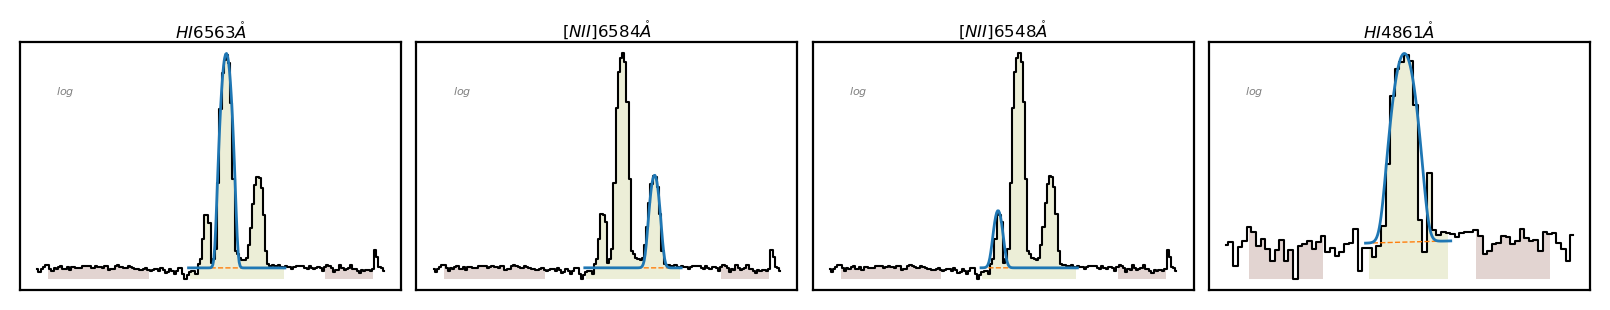

In [72]:
spec13.plot.grid()

In [73]:
spec13.save_frame('slit13_Hae_Hb.txt')

SLIT 17

In [74]:
hdul17 = fits.open('../../../reduccion/NGC1313/espectros_oficiales/slit17_1D.fits', mode='update')
header17 = hdul17[0].header
#header['BUNIT'] = '1e-15 erg / (Angstrom s cm2)'
header17['FLUXSCAL'] = 1
header17

hdul17.flush()

In [75]:
print(header17)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    1 / Number of axes                                 NAXIS1  =                 2325 / Axis length                                    EXTEND  =                    F / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        OBJECT  = 'NGC1313-MSK01 2D CON LACOS' / Name of the object observed            DATE    = '2024-11-08T15:53:29' / Date FITS file was generated                  IRAF-TLM= '2024-11-08T15:53:29' / Time of last modification                     FIXPIX  = 'Jun 14 10:25 Bad pixel file is tmpbpm894khg.pl'                      CTYPE1  = 'LINEAR  '           / R.A. in tangent plane projection               CRPIX1  =                   1. / Ref pix of axis 1                              CRVAL1  =      4031.8603515625 / RA at R

In [76]:
#now we specify the location and load the data
#address of NGC1313 spectrum (in this case, here)
fits_file17 = '../../../reduccion/NGC1313/espectros_oficiales/slit17_1D.fits'

#load the data
wave17, flux17, hdr17 = import_1313_fits(fits_file17)

In [77]:
spec17 = lime.Spectrum(wave17, flux17, redshift=z_obj, norm_flux=normFlux, units_flux='1e-15 * FLAM')

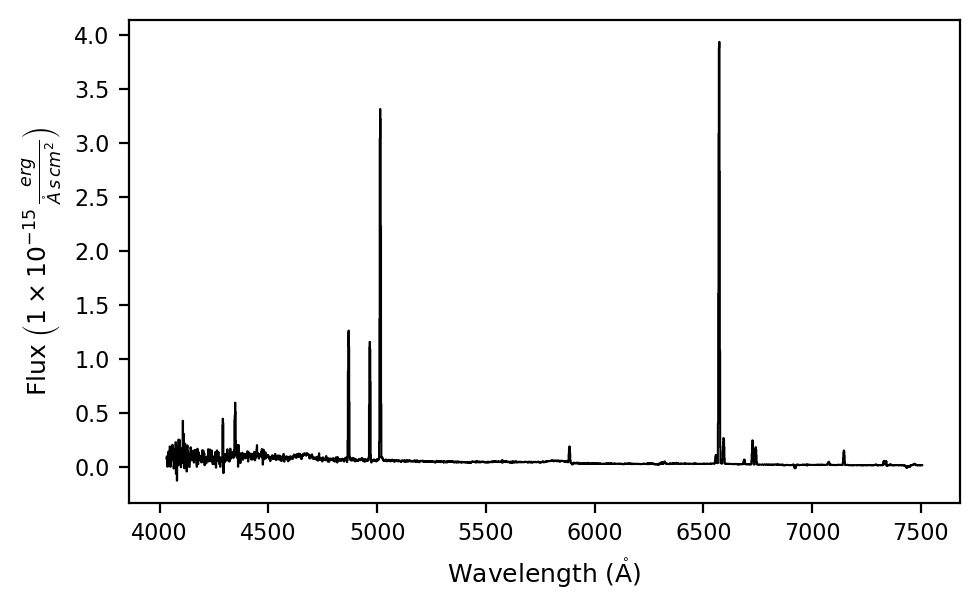

In [78]:
spec17.plot.spectrum(label='slit17_mask1_NGC1313')

In [79]:
# Line name, its location mask in the rest _frame and fit configuration
line17_Ha = 'H1_6563A_b'
band_edges17_Ha = np.array([6438.03, 6508.66, 6535.10, 6600.95, 6627.70, 6661.82])
fit_conf17_Ha = {'H1_6563A_b': 'H1_6563A+N2_6584A+N2_6548A',
            'N2_6548A_amp': {'expr': 'N2_6584A_amp/2.94'},
            'N2_6548A_kinem': 'N2_6584A'}

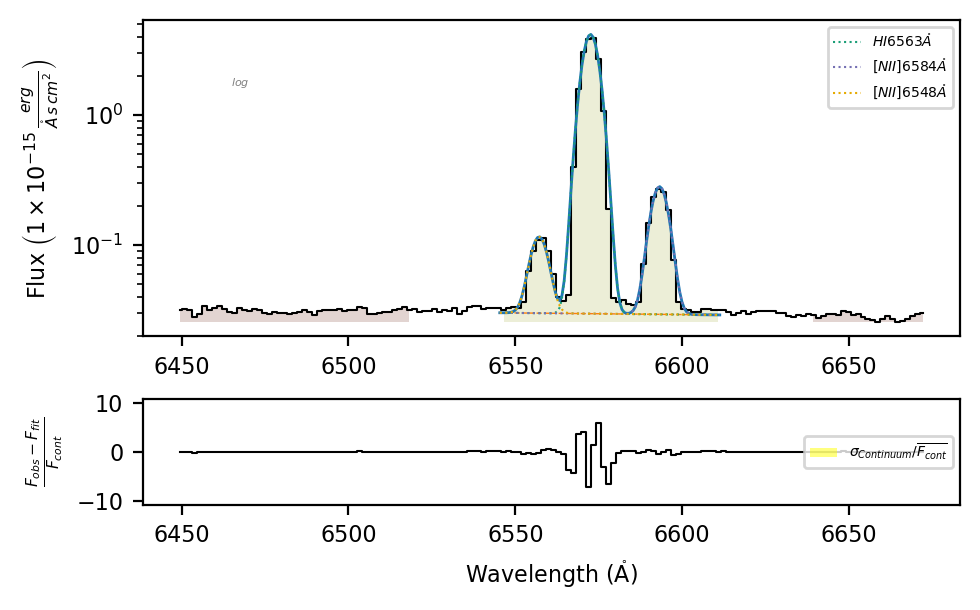

In [80]:
# New attempt including the fit configuration
spec17.fit.bands(line17_Ha, band_edges17_Ha, fit_conf=fit_conf17_Ha)
spec17.plot.bands()

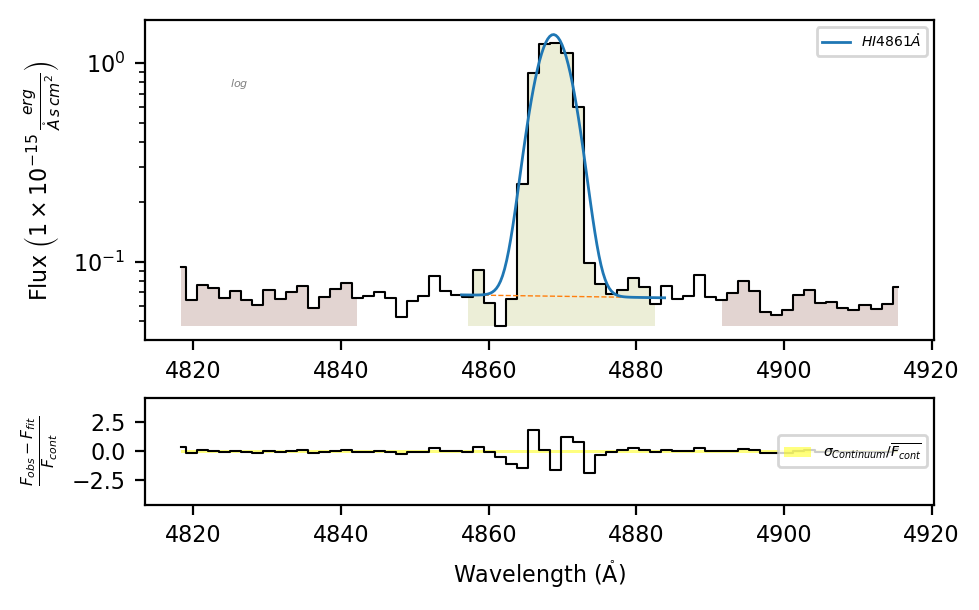

In [81]:
spec17.fit.bands('H1_4861A')
spec17.plot.bands()

In [82]:
spec17.fit.frame

<bound method SpecTreatment.frame of <lime.workflow.SpecTreatment object at 0x1377fb890>>

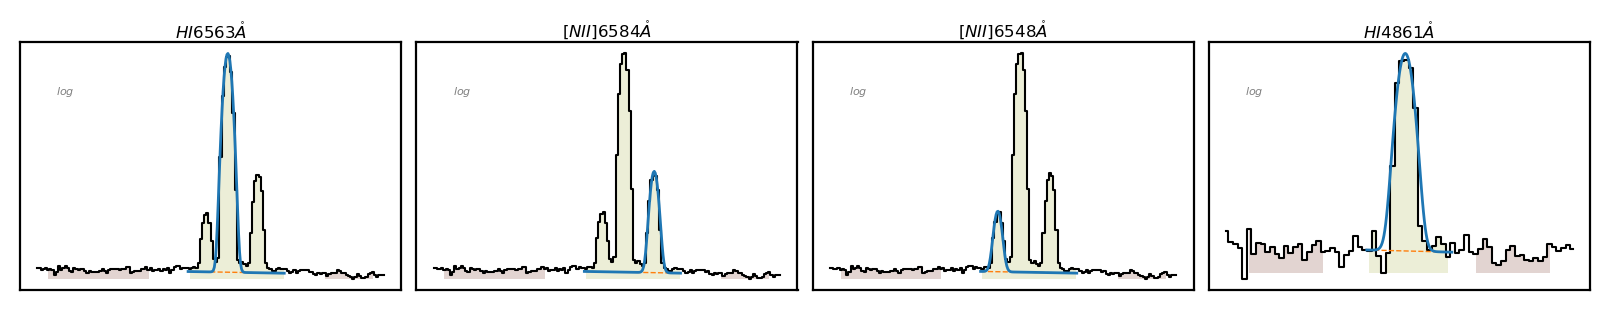

In [83]:
spec17.plot.grid()

In [191]:
spec17.save_frame('slit17_Hae_Hb.txt')

SLIT 19

In [84]:
hdul19 = fits.open('../../../reduccion/NGC1313/espectros_oficiales/slit19_1D.fits', mode='update')
header19 = hdul19[0].header
#header['BUNIT'] = '1e-15 erg / (Angstrom s cm2)'
header19['FLUXSCAL'] = 1
header19

hdul19.flush()

In [85]:
print(header19)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    1 / Number of axes                                 NAXIS1  =                 2680 / Axis length                                    EXTEND  =                    F / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        OBJECT  = 'NGC1313-MSK01 2D CON LACOS' / Name of the object observed            DATE    = '2024-11-08T15:53:42' / Date FITS file was generated                  IRAF-TLM= '2024-11-08T15:53:42' / Time of last modification                     FIXPIX  = 'Jun 14 10:25 Bad pixel file is tmpbpm894khg.pl'                      CTYPE1  = 'LINEAR  '           / R.A. in tangent plane projection               CRPIX1  =                   1. / Ref pix of axis 1                              CRVAL1  =     4033.97583007813 / RA at R

In [86]:
#now we specify the location and load the data
#address of NGC1313 spectrum (in this case, here)
fits_file19 = '../../../reduccion/NGC1313/espectros_oficiales/slit19_1D.fits'

#load the data
wave19, flux19, hdr19 = import_1313_fits(fits_file19)

In [87]:
spec19 = lime.Spectrum(wave19, flux19, redshift=z_obj, norm_flux=normFlux, units_flux='1e-15 * FLAM')

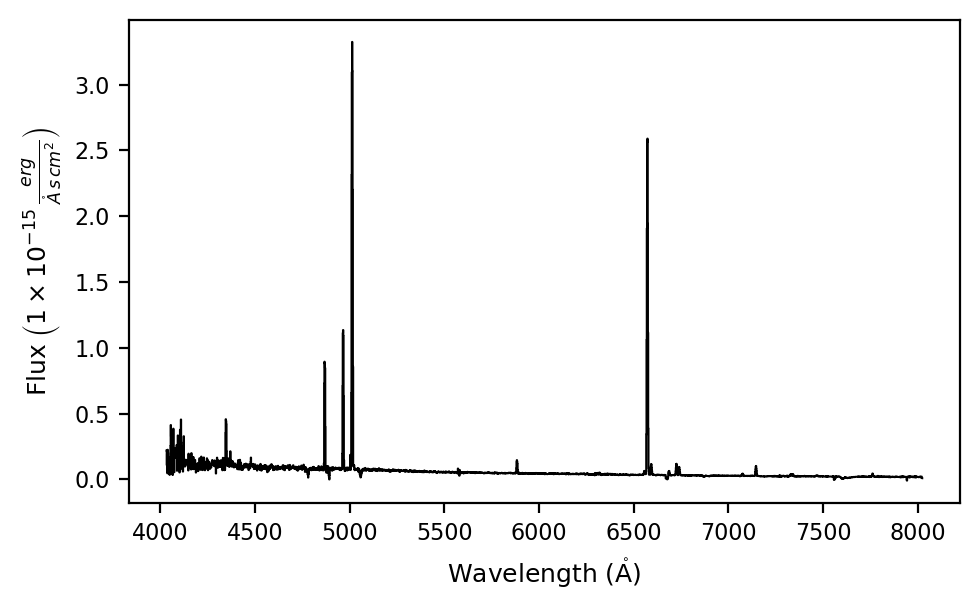

In [88]:
spec19.plot.spectrum(label='slit19_mask1_NGC1313')

In [91]:
# Line name, its location mask in the rest _frame and fit configuration
line19_Ha = 'H1_6563A_b'
band_edges19_Ha = np.array([6438.03, 6508.66, 6535.10, 6600.95, 6627.70, 6659.82])
fit_conf19_Ha = {'H1_6563A_b': 'H1_6563A+N2_6584A+N2_6548A',
            'N2_6548A_amp': {'expr': 'N2_6584A_amp/2.94'},
            'N2_6548A_kinem': 'N2_6584A'}

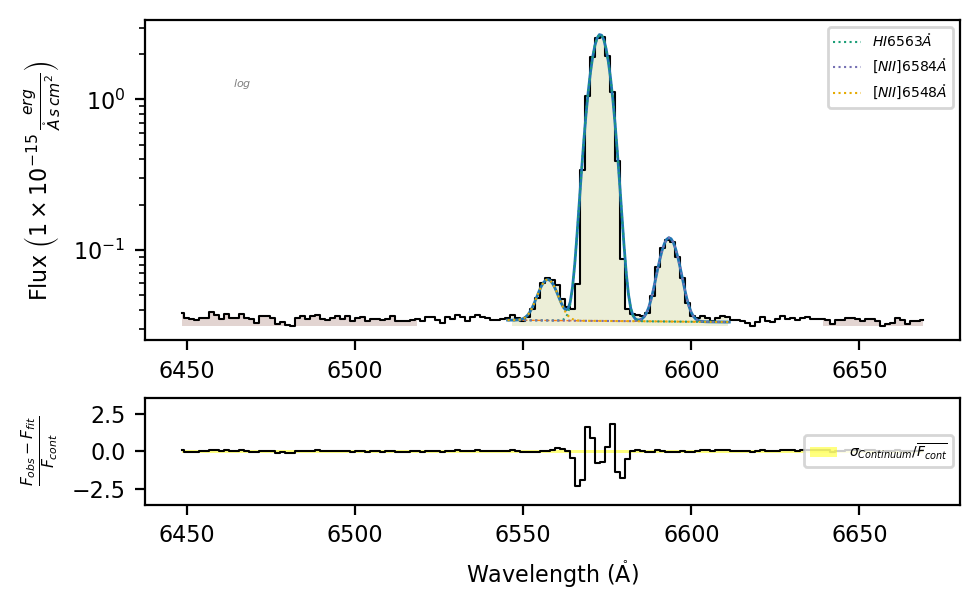

In [92]:
# New attempt including the fit configuration
spec19.fit.bands(line19_Ha, band_edges19_Ha, fit_conf=fit_conf19_Ha)
spec19.plot.bands()

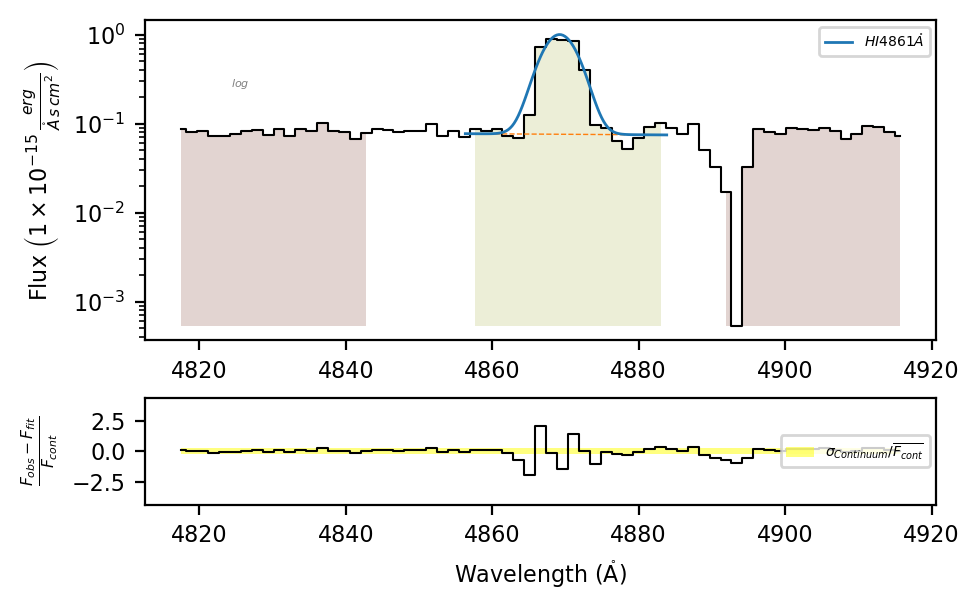

In [93]:
spec19.fit.bands('H1_4861A')
spec19.plot.bands()

In [96]:
# Line name and its location mask in the rest _frame
line19_Hb = 'H1_4861A'
band_edges19_Hb = np.array([4809.80, 4836.10, 4848.715437, 4876.181741, 4888.13, 4908.40])

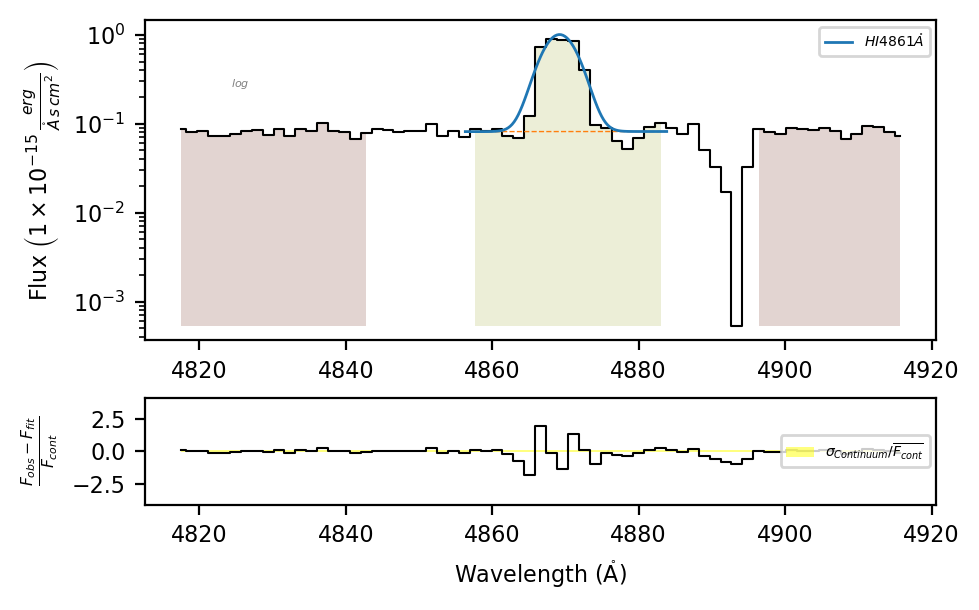

In [97]:
# Run the fitting and plot it
spec19.fit.bands(line19_Hb, band_edges19_Hb)
spec19.plot.bands()

In [98]:
spec19.fit.frame

<bound method SpecTreatment.frame of <lime.workflow.SpecTreatment object at 0x1385df500>>

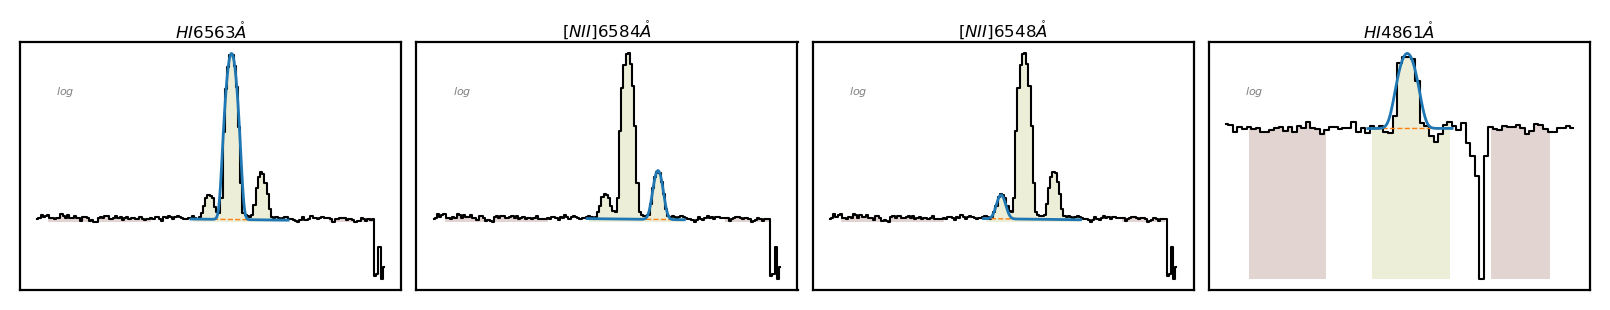

In [99]:
spec19.plot.grid()

In [192]:
spec19.save_frame('slit19_Hae_Hb.txt')

SLIT 21

In [100]:
hdul21_1 = fits.open('../../../reduccion/NGC1313/espectros_oficiales/slit21_mask1_1D.fits', mode='update')
header21_1 = hdul21_1[0].header
#header['BUNIT'] = '1e-15 erg / (Angstrom s cm2)'
header21_1['FLUXSCAL'] = 1
header21_1

hdul21_1.flush()

In [101]:
print(header21_1)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    1 / Number of axes                                 NAXIS1  =                 2799 / Axis length                                    EXTEND  =                    F / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        OBJECT  = 'NGC1313-MSK01 2D CON LACOS' / Name of the object observed            DATE    = '2024-11-08T15:54:04' / Date FITS file was generated                  IRAF-TLM= '2024-11-08T15:54:04' / Time of last modification                     FIXPIX  = 'Jun 14 10:25 Bad pixel file is tmpbpm894khg.pl'                      CTYPE1  = 'LINEAR  '           / R.A. in tangent plane projection               CRPIX1  =                   1. / Ref pix of axis 1                              CRVAL1  =      4035.5361328125 / RA at R

In [102]:
#now we specify the location and load the data
#address of NGC1313 spectrum (in this case, here)
fits_file21_1 = '../../../reduccion/NGC1313/espectros_oficiales/slit21_mask1_1D.fits'

#load the data
wave21_1, flux21_1, hdr21_1 = import_1313_fits(fits_file21_1)

In [103]:
spec21_1 = lime.Spectrum(wave21_1, flux21_1, redshift=z_obj, norm_flux=normFlux, units_flux='1e-15 * FLAM')

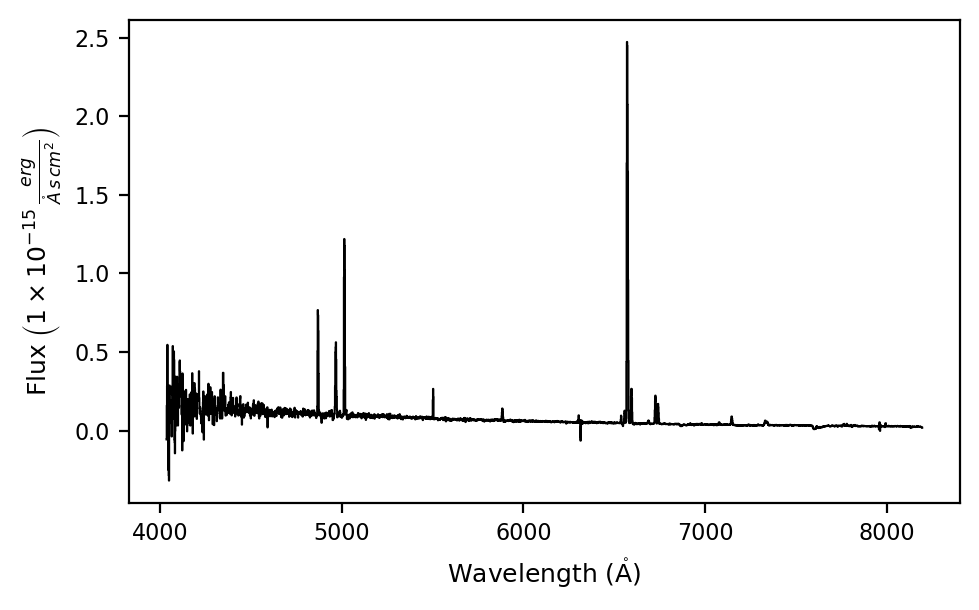

In [104]:
spec21_1.plot.spectrum(label='slit21_mask1_NGC1313')

In [105]:
# Line name, its location mask in the rest _frame and fit configuration
line21_1_Ha = 'H1_6563A_b'
band_edges21_1_Ha = np.array([6438.03, 6508.66, 6535.10, 6600.95, 6627.70, 6659.82])
fit_conf21_1_Ha = {'H1_6563A_b': 'H1_6563A+N2_6584A+N2_6548A',
            'N2_6548A_amp': {'expr': 'N2_6584A_amp/2.94'},
            'N2_6548A_kinem': 'N2_6584A'}

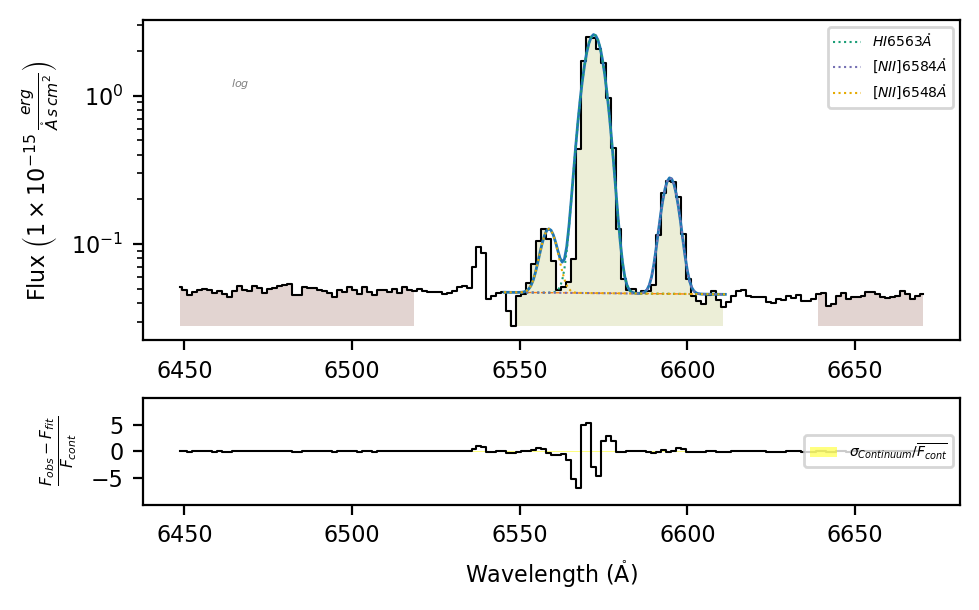

In [106]:
# New attempt including the fit configuration
spec21_1.fit.bands(line21_1_Ha, band_edges21_1_Ha, fit_conf=fit_conf21_1_Ha)
spec21_1.plot.bands()

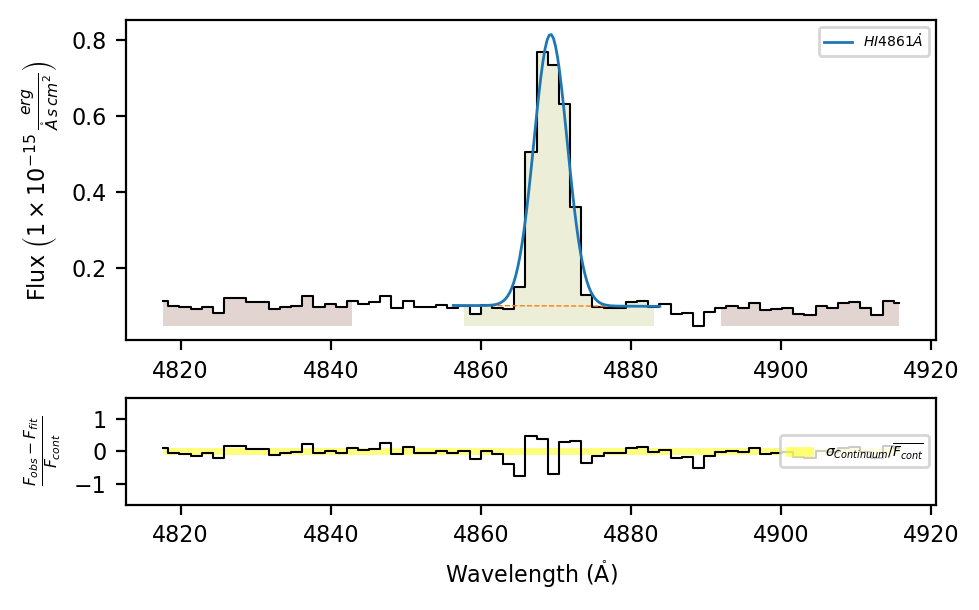

In [107]:
spec21_1.fit.bands('H1_4861A')
spec21_1.plot.bands()

In [108]:
spec21_1.fit.frame

<bound method SpecTreatment.frame of <lime.workflow.SpecTreatment object at 0x13a2e3a10>>

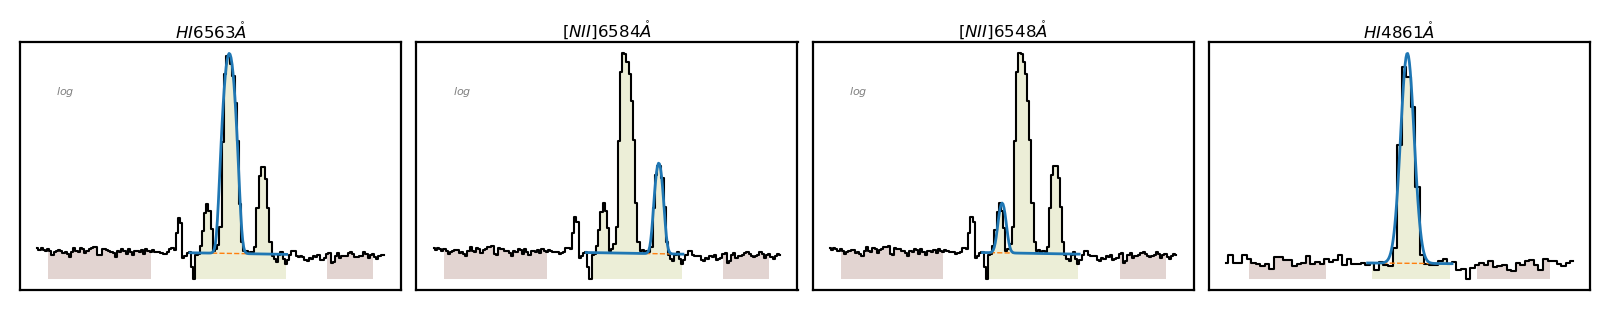

In [109]:
spec21_1.plot.grid()

In [194]:
spec21_1.save_frame('slit21_1_Hae_Hb.txt')

SLIT 23

In [110]:
hdul23_1 = fits.open('../../../reduccion/NGC1313/espectros_oficiales/slit23_mask1_1D.fits', mode='update')
header23_1 = hdul23_1[0].header
#header['BUNIT'] = '1e-15 erg / (Angstrom s cm2)'
header23_1['FLUXSCAL'] = 1
header23_1

hdul23_1.flush()

In [111]:
print(header23_1)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    1 / Number of axes                                 NAXIS1  =                 2704 / Axis length                                    EXTEND  =                    F / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        OBJECT  = 'NGC1313-MSK01 2D CON LACOS' / Name of the object observed            DATE    = '2024-11-08T15:54:15' / Date FITS file was generated                  IRAF-TLM= '2024-11-08T15:54:15' / Time of last modification                     FIXPIX  = 'Jun 14 10:25 Bad pixel file is tmpbpm894khg.pl'                      CTYPE1  = 'LINEAR  '           / R.A. in tangent plane projection               CRPIX1  =                   1. / Ref pix of axis 1                              CRVAL1  =     4033.54272460937 / RA at R

In [112]:
#now we specify the location and load the data
#address of NGC1313 spectrum (in this case, here)
fits_file23_1 = '../../../reduccion/NGC1313/espectros_oficiales/slit23_mask1_1D.fits'

#load the data
wave23_1, flux23_1, hdr23_1 = import_1313_fits(fits_file23_1)

In [113]:
spec23_1 = lime.Spectrum(wave23_1, flux23_1, redshift=z_obj, norm_flux=normFlux, units_flux='1e-15 * FLAM')

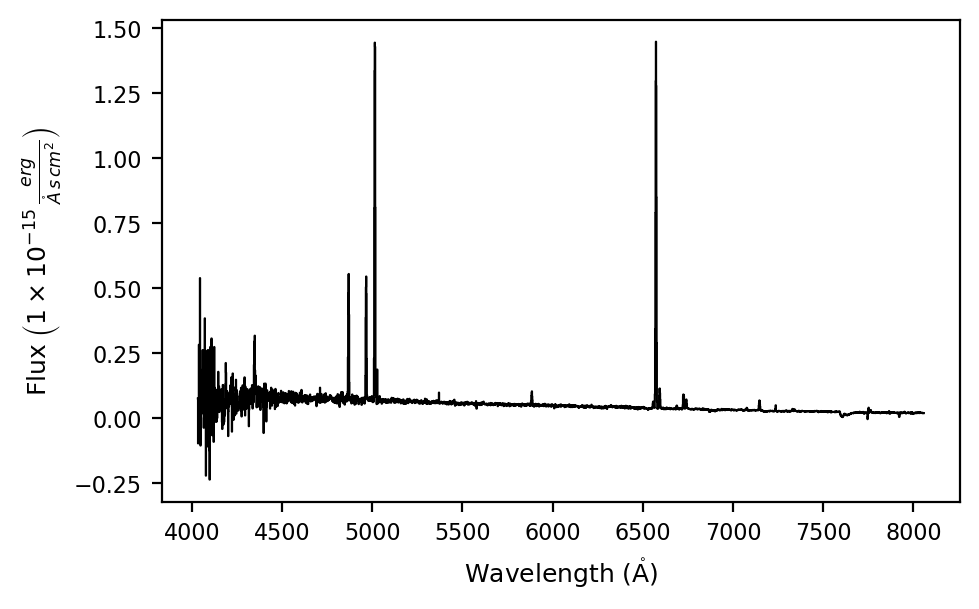

In [114]:
spec23_1.plot.spectrum(label='slit23_mask1_NGC1313')

In [115]:
# Line name, its location mask in the rest _frame and fit configuration
line23_1_Ha = 'H1_6563A_b'
band_edges23_1_Ha = np.array([6438.03, 6508.66, 6535.10, 6600.95, 6627.70, 6659.82])
fit_conf23_1_Ha = {'H1_6563A_b': 'H1_6563A+N2_6584A+N2_6548A',
            'N2_6548A_amp': {'expr': 'N2_6584A_amp/2.94'},
            'N2_6548A_kinem': 'N2_6584A'}

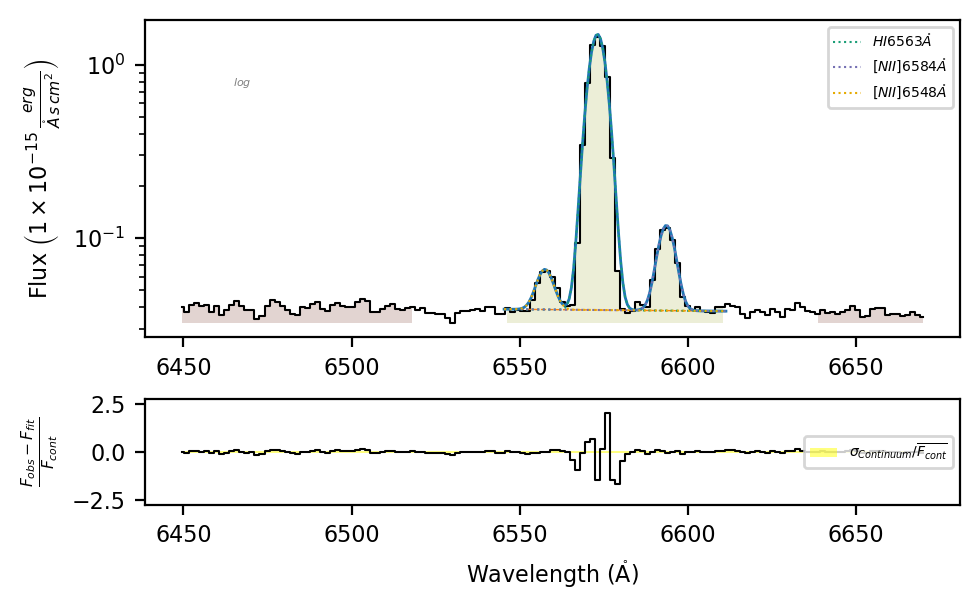

In [116]:
# New attempt including the fit configuration
spec23_1.fit.bands(line23_1_Ha, band_edges23_1_Ha, fit_conf=fit_conf23_1_Ha)
spec23_1.plot.bands()

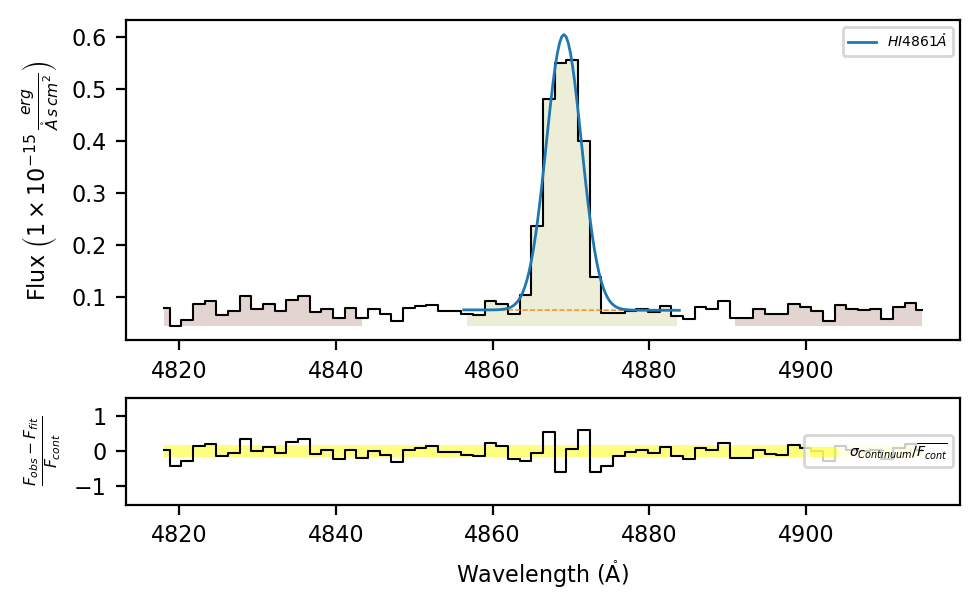

In [117]:
spec23_1.fit.bands('H1_4861A')
spec23_1.plot.bands()

In [118]:
spec23_1.fit.frame

<bound method SpecTreatment.frame of <lime.workflow.SpecTreatment object at 0x1385aabd0>>

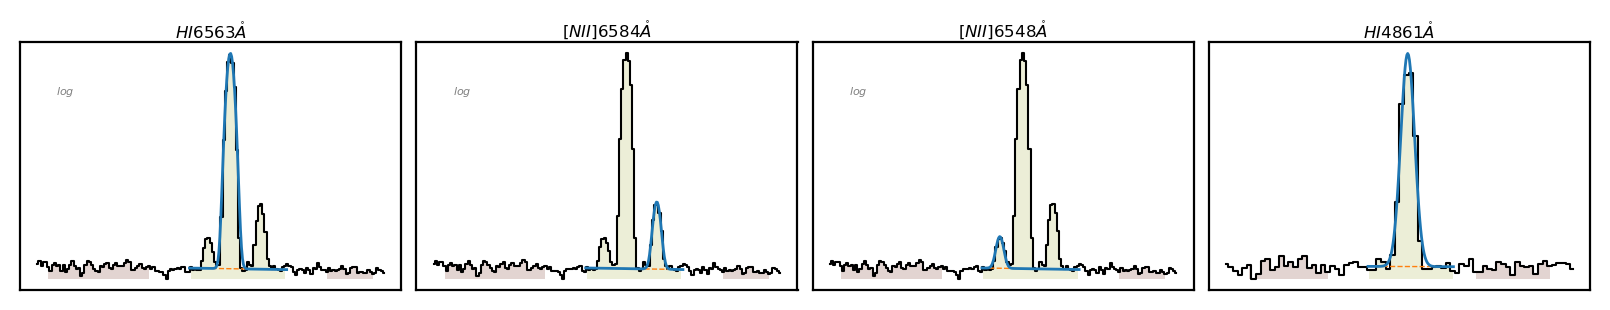

In [119]:
spec23_1.plot.grid()

In [195]:
spec23_1.save_frame('slit23_1_Hae_Hb.txt')

MASK 2

In [120]:
hdul4 = fits.open('../../../reduccion/NGC1313/espectros_oficiales/slit4_1D.fits', mode='update')
header4 = hdul4[0].header
#header['BUNIT'] = '1e-15 erg / (Angstrom s cm2)'
header4['FLUXSCAL'] = 1
header4

hdul4.flush()

In [121]:
print(header4)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    1 / Number of axes                                 NAXIS1  =                 2245 / Axis length                                    EXTEND  =                    F / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        OBJECT  = 'NGC1313-FIELD2 MASK02_median_avsig' / Name of the object observed    DATE    = '2024-11-08T14:27:35' / Date FITS file was generated                  IRAF-TLM= '2024-11-08T14:27:35' / Time of last modification                     FIXPIX  = 'Sep 24 17:25 Bad pixel file is tmpbpm899t.pl'                        CTYPE1  = 'LINEAR  '           / R.A. in tangent plane projection               CRPIX1  =                   1. / Ref pix of axis 1                              CRVAL1  =     4024.07153320312 / RA at R

In [122]:
#now we specify the location and load the data
#address of NGC1313 spectrum (in this case, here)
fits_file4 = '../../../reduccion/NGC1313/espectros_oficiales/slit4_1D.fits'

#load the data
wave4, flux4, hdr4 = import_1313_fits(fits_file4)

In [123]:
spec4 = lime.Spectrum(wave4, flux4, redshift=z_obj, norm_flux=normFlux, units_flux='1e-15 * FLAM')

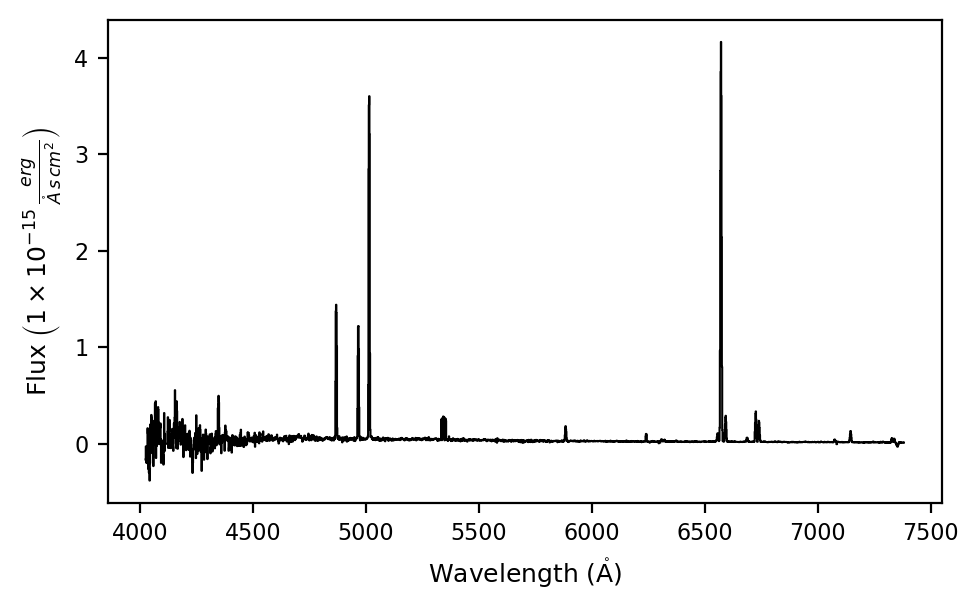

In [124]:
spec4.plot.spectrum(label='slit4_mask2_NGC1313')

In [125]:
# Line name, its location mask in the rest _frame and fit configuration
line4_Ha = 'H1_6563A_b'
band_edges4_Ha = np.array([6438.03, 6508.66, 6535.10, 6600.95, 6627.70, 6661.82])
fit_conf4_Ha = {'H1_6563A_b': 'H1_6563A+N2_6584A+N2_6548A',
            'N2_6548A_amp': {'expr': 'N2_6584A_amp/2.94'},
            'N2_6548A_kinem': 'N2_6584A'}

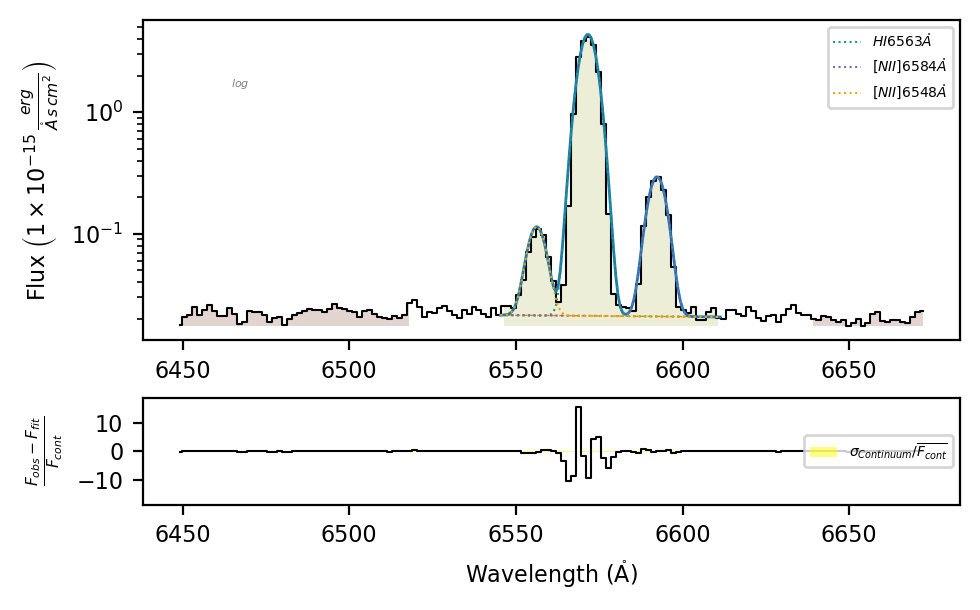

In [126]:
# New attempt including the fit configuration
spec4.fit.bands(line4_Ha, band_edges4_Ha, fit_conf=fit_conf4_Ha)
spec4.plot.bands()

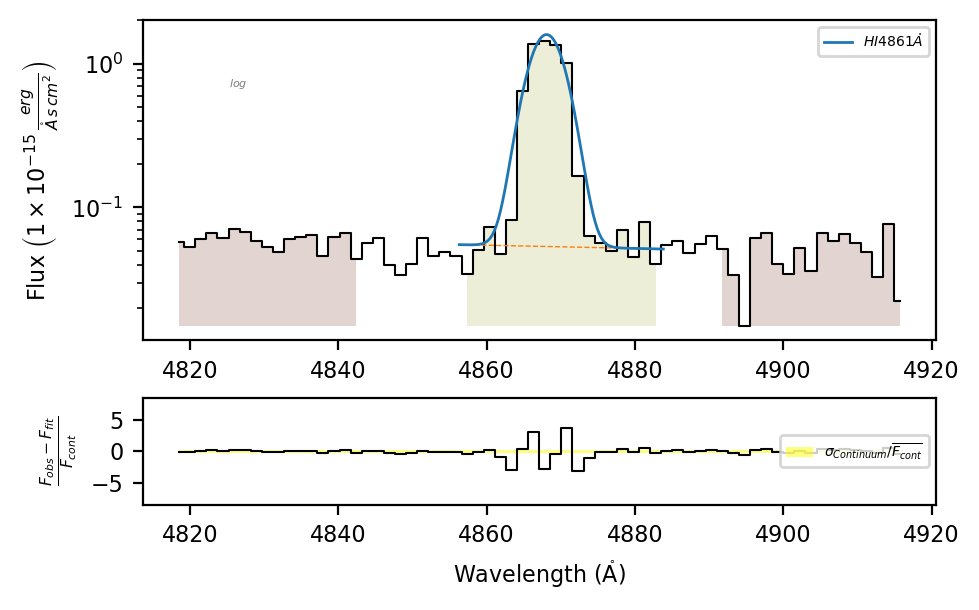

In [129]:
spec4.fit.bands('H1_4861A')
spec4.plot.bands()

In [130]:
spec4.fit.frame

<bound method SpecTreatment.frame of <lime.workflow.SpecTreatment object at 0x13a12c1d0>>

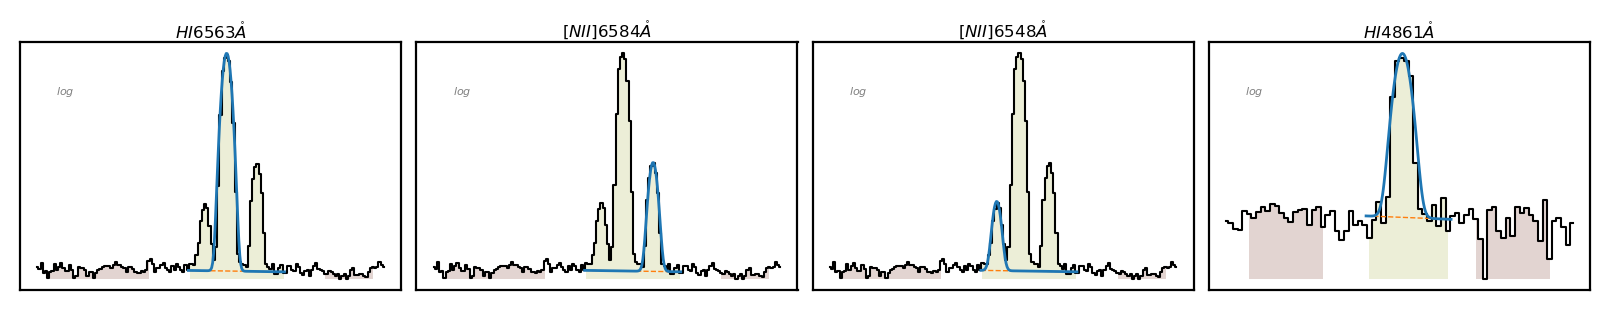

In [131]:
spec4.plot.grid()

In [196]:
spec4.save_frame('slit4_Hae_Hb.txt')

SLIT 8

In [133]:
hdul8 = fits.open('../../../reduccion/NGC1313/espectros_oficiales/slit8_1D.fits', mode='update')
header8 = hdul8[0].header
#header['BUNIT'] = '1e-15 erg / (Angstrom s cm2)'
header8['FLUXSCAL'] = 1
header8

hdul8.flush()

In [134]:
print(header8)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    1 / Number of axes                                 NAXIS1  =                 2382 / Axis length                                    EXTEND  =                    F / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        OBJECT  = 'NGC1313-FIELD2 MASK02_median_avsig' / Name of the object observed    DATE    = '2024-11-08T14:27:43' / Date FITS file was generated                  IRAF-TLM= '2024-11-08T14:27:43' / Time of last modification                     FIXPIX  = 'Sep 24 17:25 Bad pixel file is tmpbpm899t.pl'                        CTYPE1  = 'LINEAR  '           / R.A. in tangent plane projection               CRPIX1  =                   1. / Ref pix of axis 1                              CRVAL1  =     4028.45336914063 / RA at R

In [135]:
#now we specify the location and load the data
#address of NGC1313 spectrum (in this case, here)
fits_file8 = '../../../reduccion/NGC1313/espectros_oficiales/slit8_1D.fits'

#load the data
wave8, flux8, hdr8 = import_1313_fits(fits_file8)

In [136]:
spec8 = lime.Spectrum(wave8, flux8, redshift=z_obj, norm_flux=normFlux, units_flux='1e-15 * FLAM')

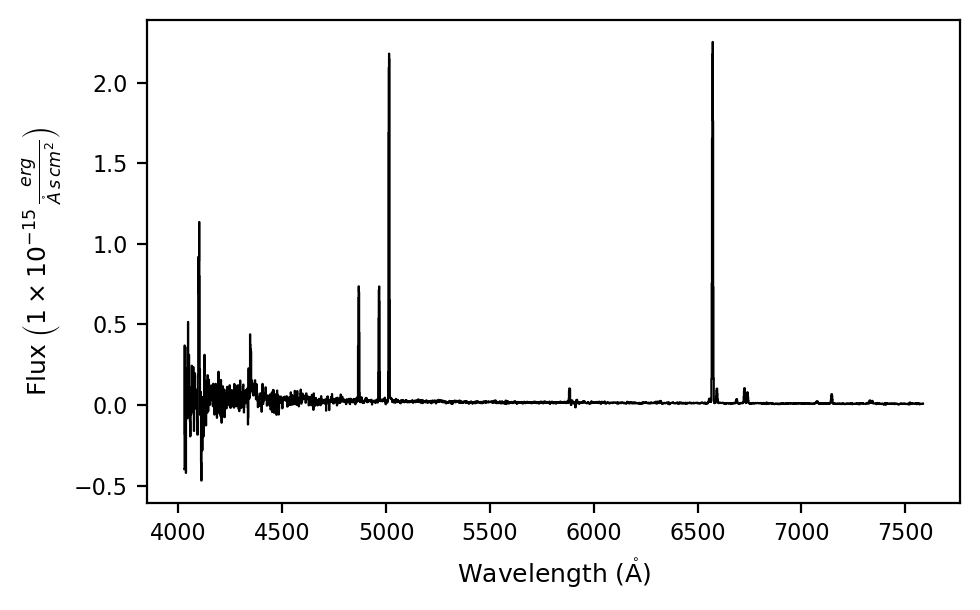

In [137]:
spec8.plot.spectrum(label='slit8_mask2_NGC1313')

In [138]:
# Line name, its location mask in the rest _frame and fit configuration
line8_Ha = 'H1_6563A_b'
band_edges8_Ha = np.array([6438.03, 6508.66, 6535.10, 6600.95, 6627.70, 6661.82])
fit_conf8_Ha = {'H1_6563A_b': 'H1_6563A+N2_6584A+N2_6548A',
            'N2_6548A_amp': {'expr': 'N2_6584A_amp/2.94'},
            'N2_6548A_kinem': 'N2_6584A'}

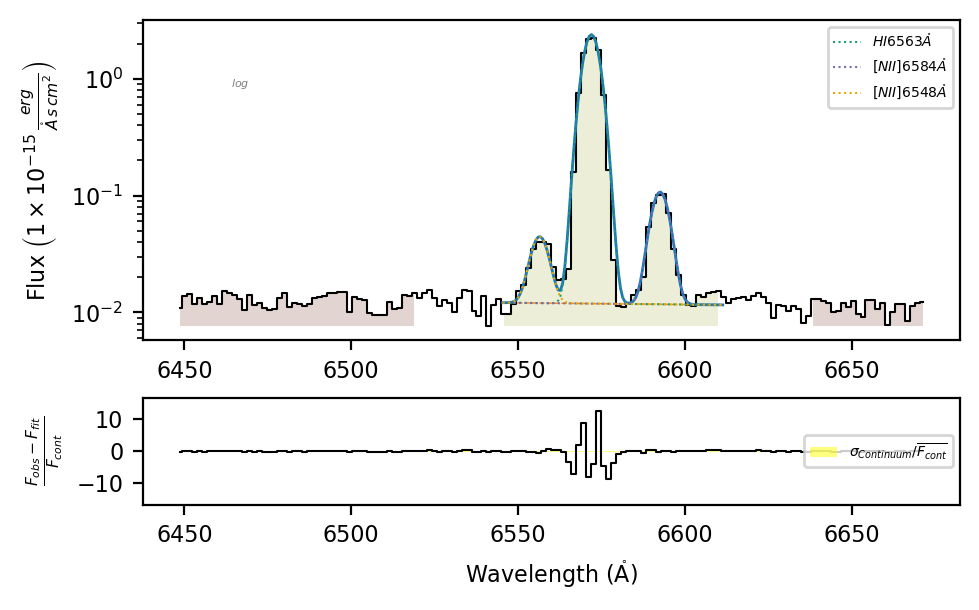

In [139]:
# New attempt including the fit configuration
spec8.fit.bands(line8_Ha, band_edges8_Ha, fit_conf=fit_conf8_Ha)
spec8.plot.bands()

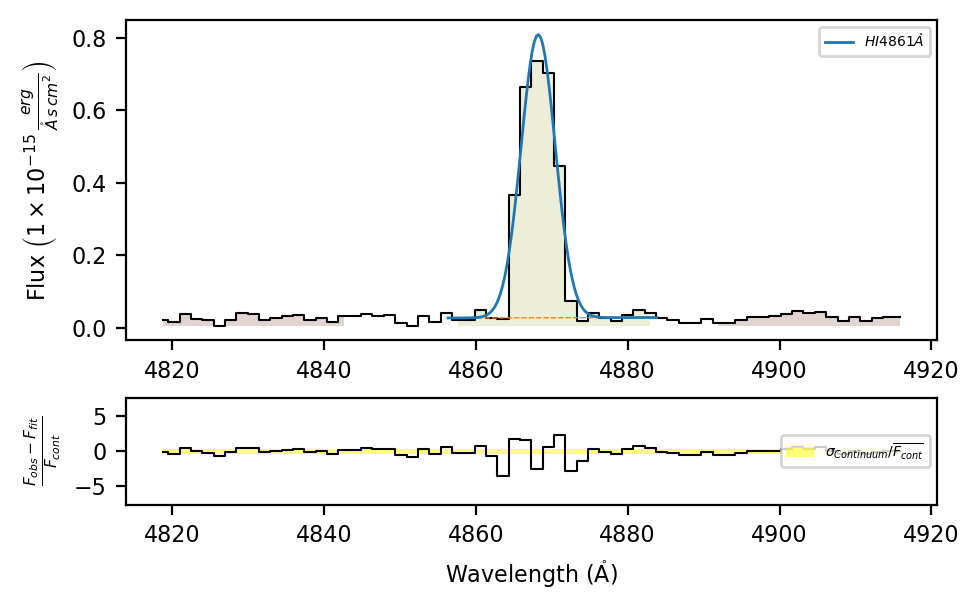

In [143]:
spec8.fit.bands('H1_4861A')
spec8.plot.bands(y_scale="linear")

In [141]:
spec8.fit.frame

<bound method SpecTreatment.frame of <lime.workflow.SpecTreatment object at 0x13cbb7410>>

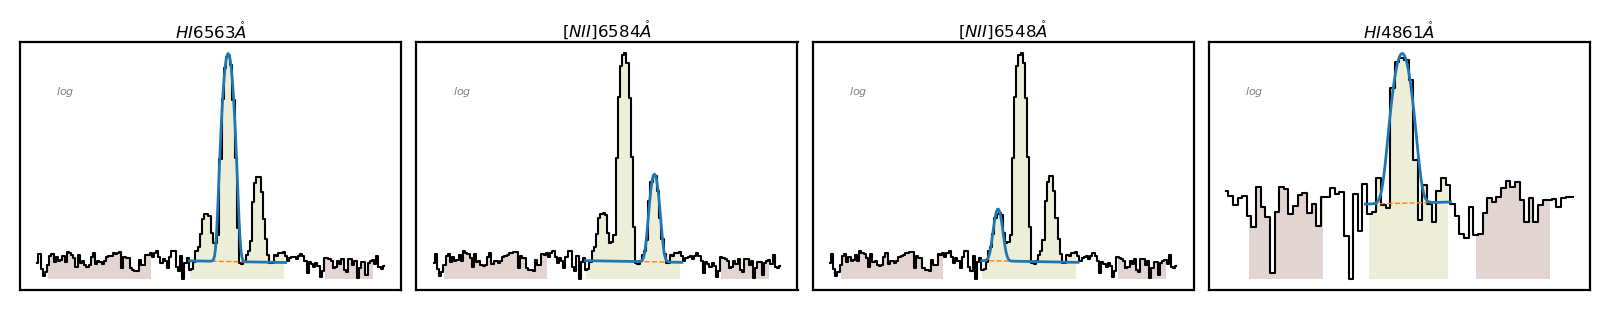

In [142]:
spec8.plot.grid()

In [197]:
spec8.save_frame('slit8_Hae_Hb.txt')

SLIT 10

In [145]:
hdul10 = fits.open('../../../reduccion/NGC1313/espectros_oficiales/slit10_1D.fits', mode='update')
header10 = hdul10[0].header
#header['BUNIT'] = '1e-15 erg / (Angstrom s cm2)'
header10['FLUXSCAL'] = 1
header10

hdul10.flush()

In [146]:
print(header10)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    1 / Number of axes                                 NAXIS1  =                 2386 / Axis length                                    EXTEND  =                    F / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        OBJECT  = 'NGC1313-FIELD2 MASK02_median_avsig' / Name of the object observed    DATE    = '2024-11-08T14:27:49' / Date FITS file was generated                  IRAF-TLM= '2024-11-08T14:27:49' / Time of last modification                     FIXPIX  = 'Sep 24 17:25 Bad pixel file is tmpbpm899t.pl'                        CTYPE1  = 'LINEAR  '           / R.A. in tangent plane projection               CRPIX1  =                   1. / Ref pix of axis 1                              CRVAL1  =     4027.77709960938 / RA at R

In [147]:
#now we specify the location and load the data
#address of NGC1313 spectrum (in this case, here)
fits_file10 = '../../../reduccion/NGC1313/espectros_oficiales/slit10_1D.fits'

#load the data
wave10, flux10, hdr10 = import_1313_fits(fits_file10)

In [157]:
spec10 = lime.Spectrum(wave10, flux10, redshift=z_obj, norm_flux=normFlux, units_flux='1e-15 * FLAM')

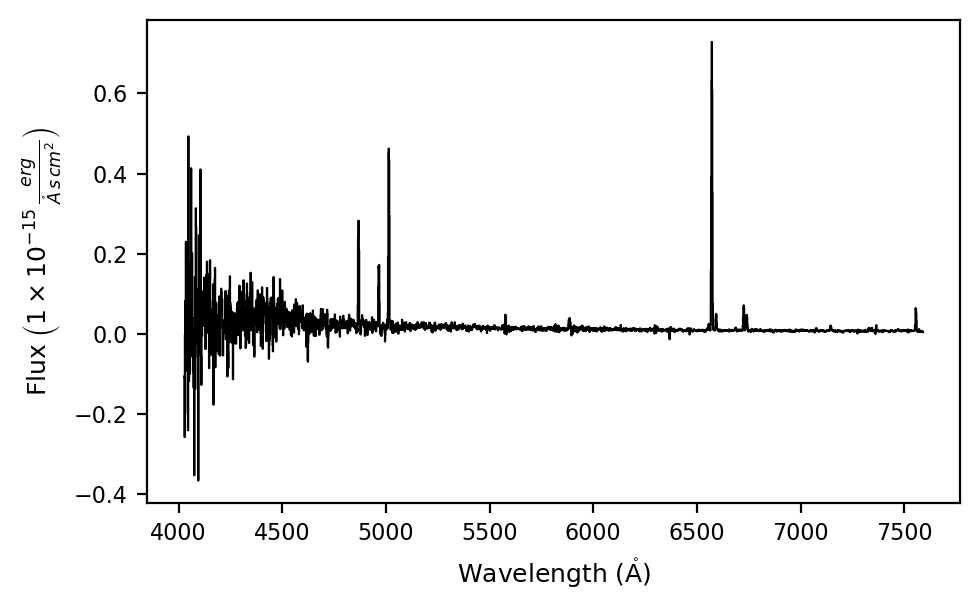

In [158]:
spec10.plot.spectrum(label='slit10_mask2_NGC1313')

In [159]:
# Line name, its location mask in the rest _frame and fit configuration
line10_Ha = 'H1_6563A_b'
band_edges10_Ha = np.array([6438.03, 6508.66, 6535.10, 6600.95, 6627.70, 6661.82])
fit_conf10_Ha = {'H1_6563A_b': 'H1_6563A+N2_6584A+N2_6548A',
            'N2_6548A_amp': {'expr': 'N2_6584A_amp/2.94'},
            'N2_6548A_kinem': 'N2_6584A'}

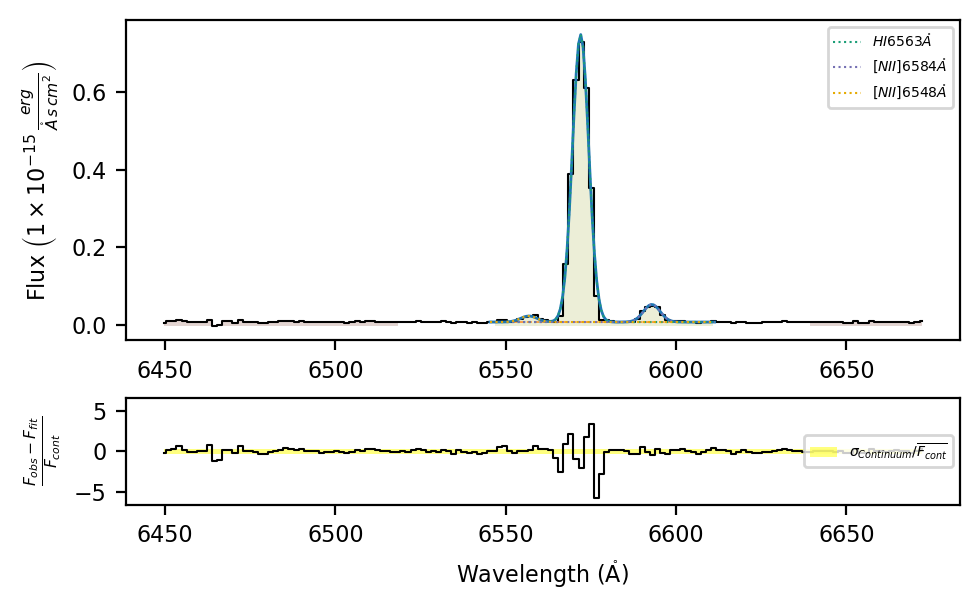

In [160]:
# New attempt including the fit configuration
spec10.fit.bands(line10_Ha, band_edges10_Ha, fit_conf=fit_conf10_Ha)
spec10.plot.bands(y_scale="linear")

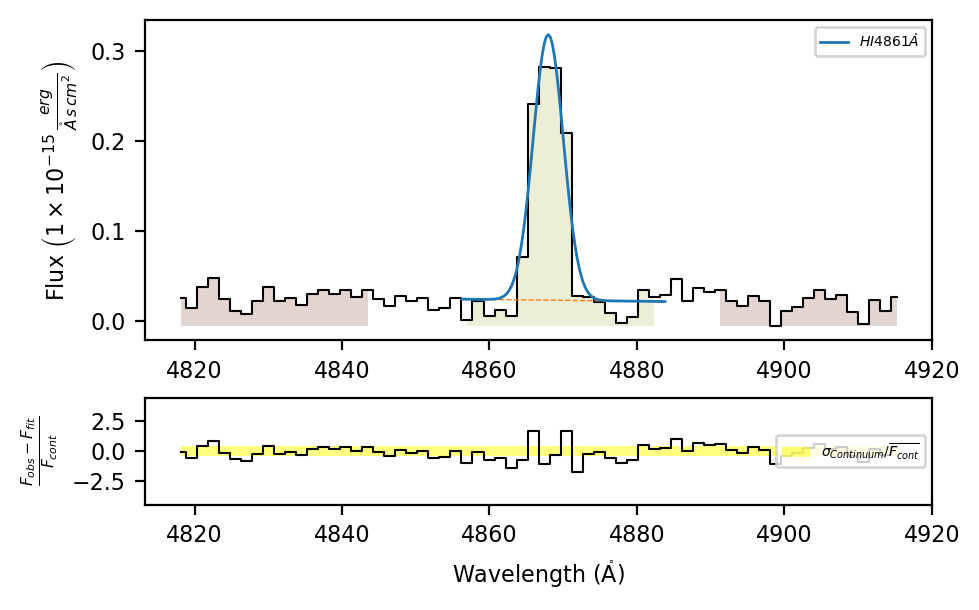

In [161]:
spec10.fit.bands('H1_4861A')
spec10.plot.bands(y_scale="linear")

In [162]:
spec10.fit.frame

<bound method SpecTreatment.frame of <lime.workflow.SpecTreatment object at 0x13f771df0>>

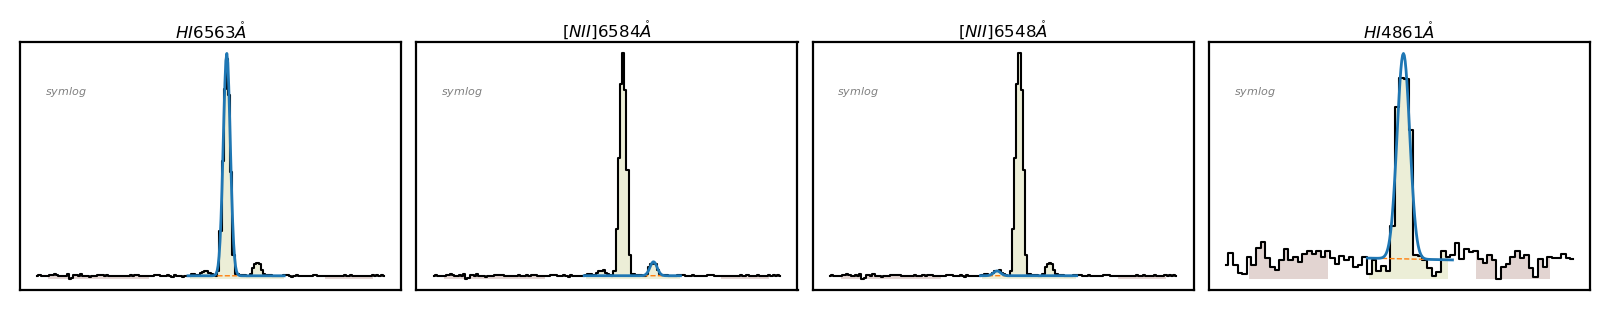

In [163]:
spec10.plot.grid()

In [198]:
spec10.save_frame('slit10_Hae_Hb.txt')

SLIT 12

In [165]:
hdul12 = fits.open('../../../reduccion/NGC1313/espectros_oficiales/slit12_1D.fits', mode='update')
header12 = hdul12[0].header
#header['BUNIT'] = '1e-15 erg / (Angstrom s cm2)'
header12['FLUXSCAL'] = 1
header12

hdul12.flush()

In [166]:
print(header12)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    1 / Number of axes                                 NAXIS1  =                 2440 / Axis length                                    EXTEND  =                    F / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        OBJECT  = 'NGC1313-FIELD2 MASK02_median_avsig' / Name of the object observed    DATE    = '2024-11-08T14:27:55' / Date FITS file was generated                  IRAF-TLM= '2024-11-08T14:27:55' / Time of last modification                     FIXPIX  = 'Sep 24 17:25 Bad pixel file is tmpbpm899t.pl'                        CTYPE1  = 'LINEAR  '           / R.A. in tangent plane projection               CRPIX1  =                   1. / Ref pix of axis 1                              CRVAL1  =     4031.98266601562 / RA at R

In [167]:
#now we specify the location and load the data
#address of NGC1313 spectrum (in this case, here)
fits_file12 = '../../../reduccion/NGC1313/espectros_oficiales/slit12_1D.fits'

#load the data
wave12, flux12, hdr12 = import_1313_fits(fits_file12)

In [168]:
spec12 = lime.Spectrum(wave12, flux12, redshift=z_obj, norm_flux=normFlux, units_flux='1e-15 * FLAM')

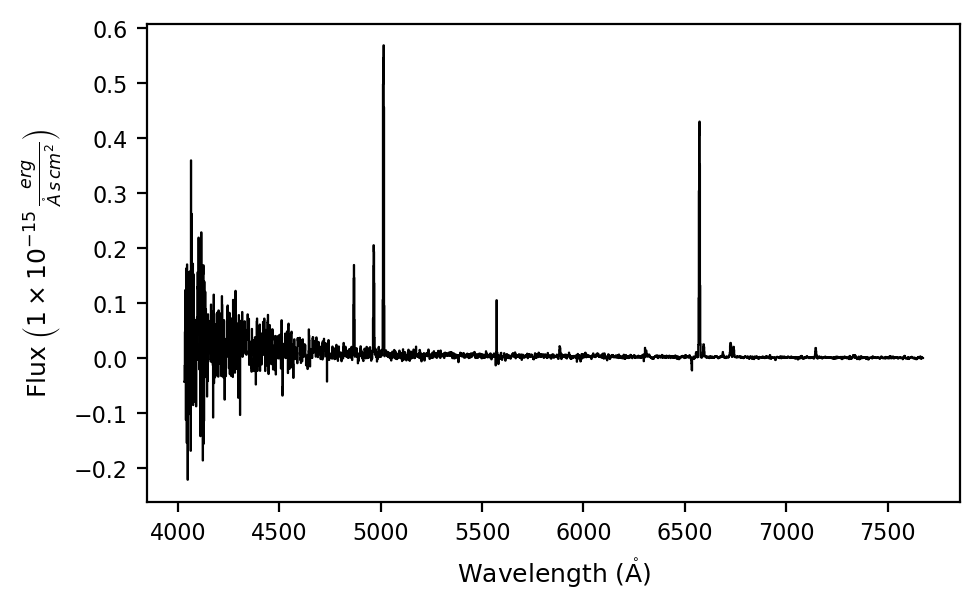

In [169]:
spec12.plot.spectrum(label='slit12_mask2_NGC1313')

In [170]:
# Line name, its location mask in the rest _frame and fit configuration
line12_Ha = 'H1_6563A_b'
band_edges12_Ha = np.array([6438.03, 6508.66, 6535.10, 6600.95, 6627.70, 6661.82])
fit_conf12_Ha = {'H1_6563A_b': 'H1_6563A+N2_6584A+N2_6548A',
            'N2_6548A_amp': {'expr': 'N2_6584A_amp/2.94'},
            'N2_6548A_kinem': 'N2_6584A'}

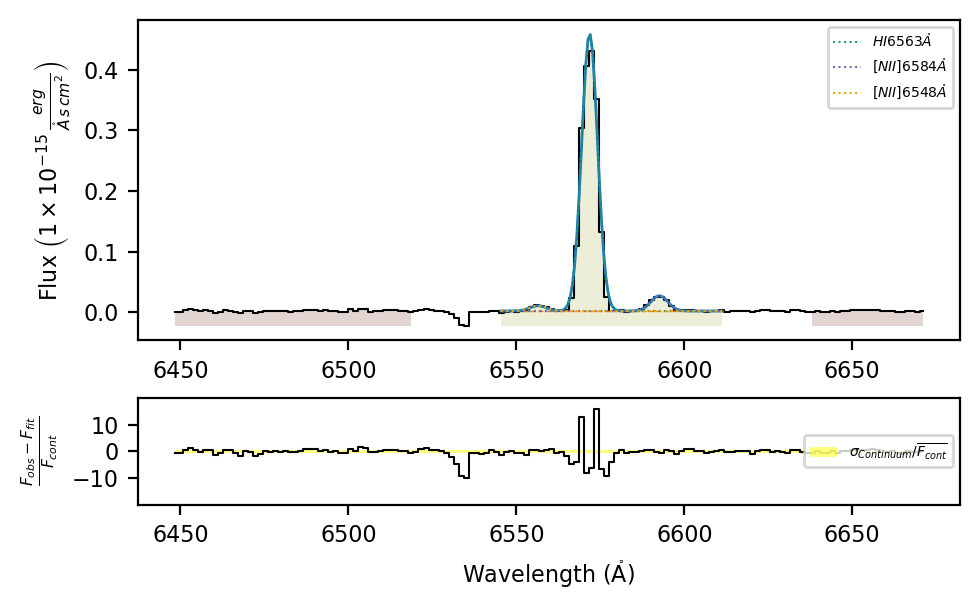

In [171]:
# New attempt including the fit configuration
spec12.fit.bands(line12_Ha, band_edges12_Ha, fit_conf=fit_conf12_Ha)
spec12.plot.bands(y_scale="linear")

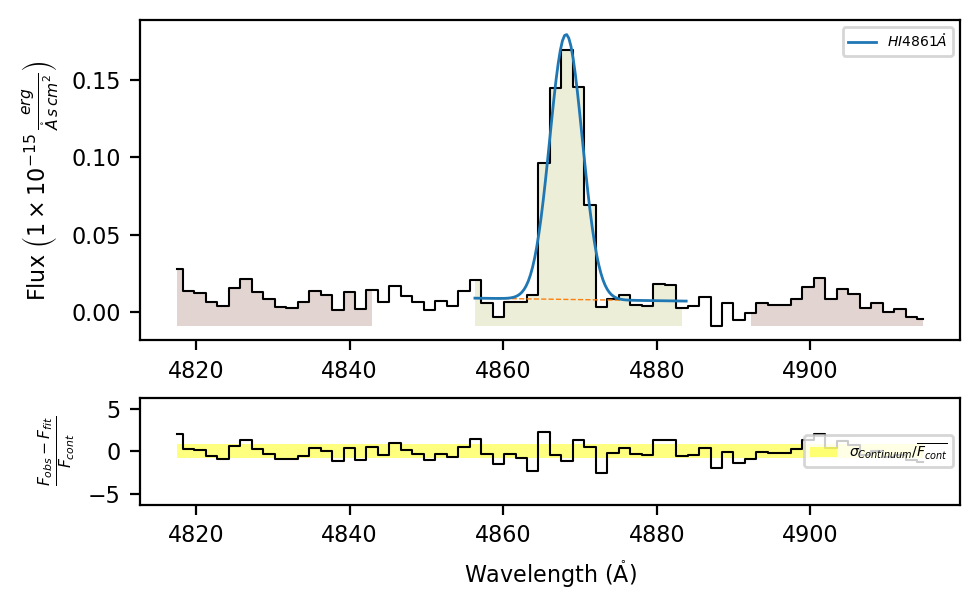

In [172]:
spec12.fit.bands('H1_4861A')
spec12.plot.bands(y_scale="linear")

In [173]:
spec12.fit.frame

<bound method SpecTreatment.frame of <lime.workflow.SpecTreatment object at 0x1414f8a70>>

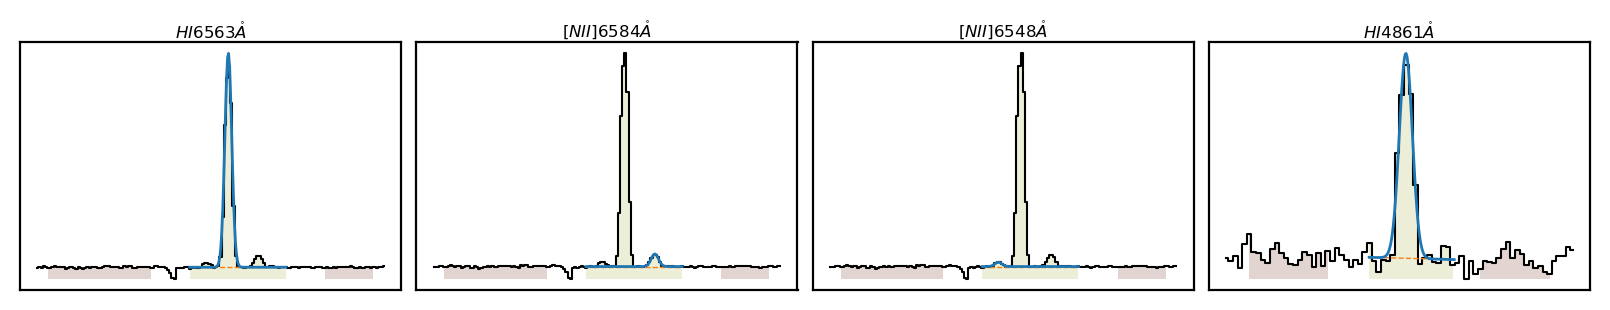

In [174]:
spec12.plot.grid()

In [199]:
spec12.save_frame('slit12_Hae_Hb.txt')

SLIT 14

In [176]:
hdul14 = fits.open('../../../reduccion/NGC1313/espectros_oficiales/slit14_1D.fits', mode='update')
header14 = hdul14[0].header
#header['BUNIT'] = '1e-15 erg / (Angstrom s cm2)'
header14['FLUXSCAL'] = 1
header14

hdul14.flush()

In [177]:
print(header14)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    1 / Number of axes                                 NAXIS1  =                 2809 / Axis length                                    EXTEND  =                    F / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        OBJECT  = 'NGC1313-FIELD2 MASK02_median_avsig' / Name of the object observed    DATE    = '2024-11-08T14:28:03' / Date FITS file was generated                  IRAF-TLM= '2024-11-08T14:28:03' / Time of last modification                     FIXPIX  = 'Sep 24 17:25 Bad pixel file is tmpbpm899t.pl'                        CTYPE1  = 'LINEAR  '           / R.A. in tangent plane projection               CRPIX1  =                   1. / Ref pix of axis 1                              CRVAL1  =     4036.02270507813 / RA at R

In [178]:
#now we specify the location and load the data
#address of NGC1313 spectrum (in this case, here)
fits_file14 = '../../../reduccion/NGC1313/espectros_oficiales/slit14_1D.fits'

#load the data
wave14, flux14, hdr14 = import_1313_fits(fits_file14)

In [179]:
spec14 = lime.Spectrum(wave14, flux14, redshift=z_obj, norm_flux=normFlux, units_flux='1e-15 * FLAM')

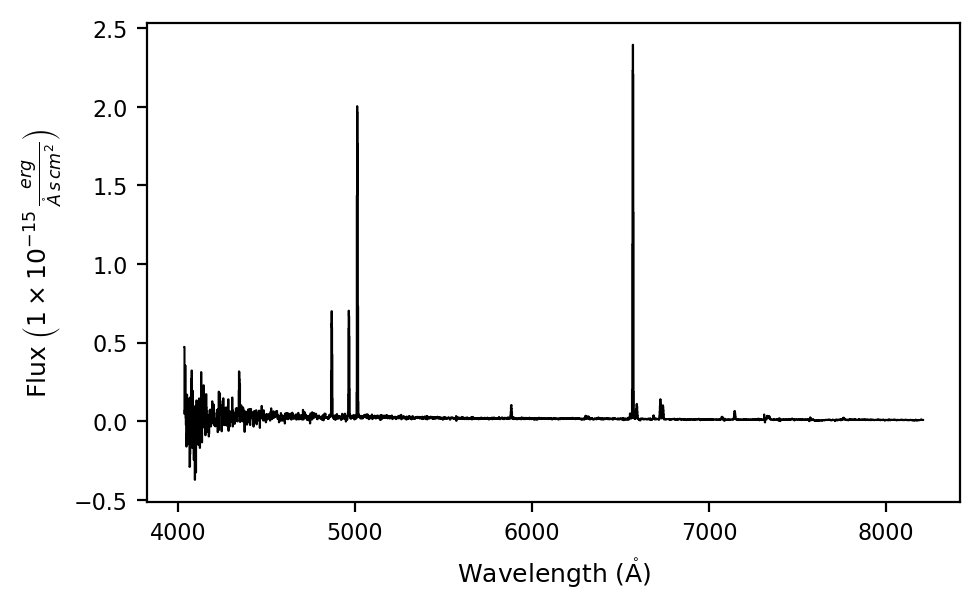

In [180]:
spec14.plot.spectrum(label='slit14_mask2_NGC1313')

In [184]:
# Line name, its location mask in the rest _frame and fit configuration
line14_Ha = 'H1_6563A_b'
band_edges14_Ha = np.array([6438.03, 6508.66, 6535.10, 6594, 6627.70, 6661.82])
fit_conf14_Ha = {'H1_6563A_b': 'H1_6563A+N2_6584A+N2_6548A',
            'N2_6548A_amp': {'expr': 'N2_6584A_amp/2.94'},
            'N2_6548A_kinem': 'N2_6584A'}

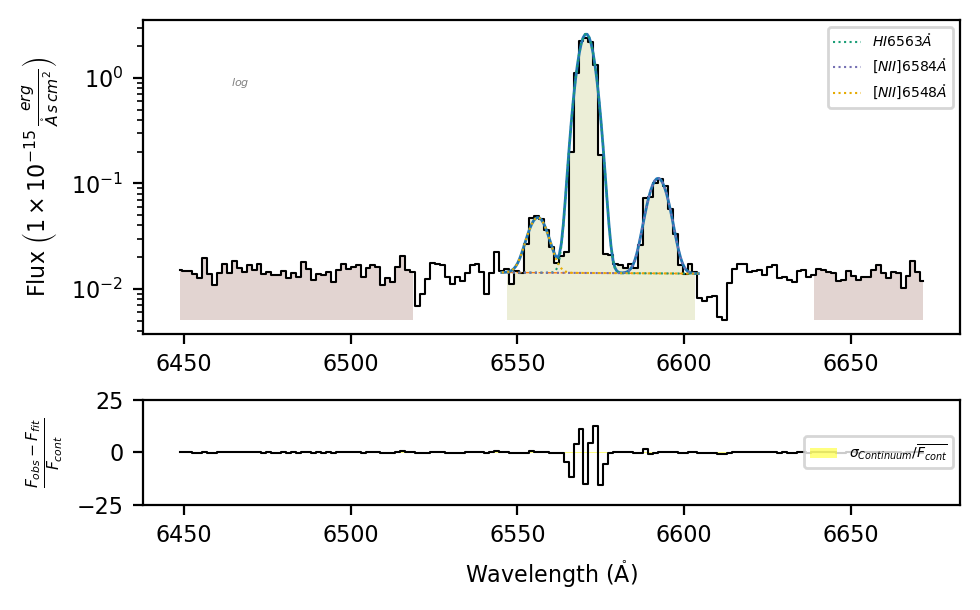

In [185]:
# New attempt including the fit configuration
spec14.fit.bands(line14_Ha, band_edges14_Ha, fit_conf=fit_conf14_Ha)
spec14.plot.bands()

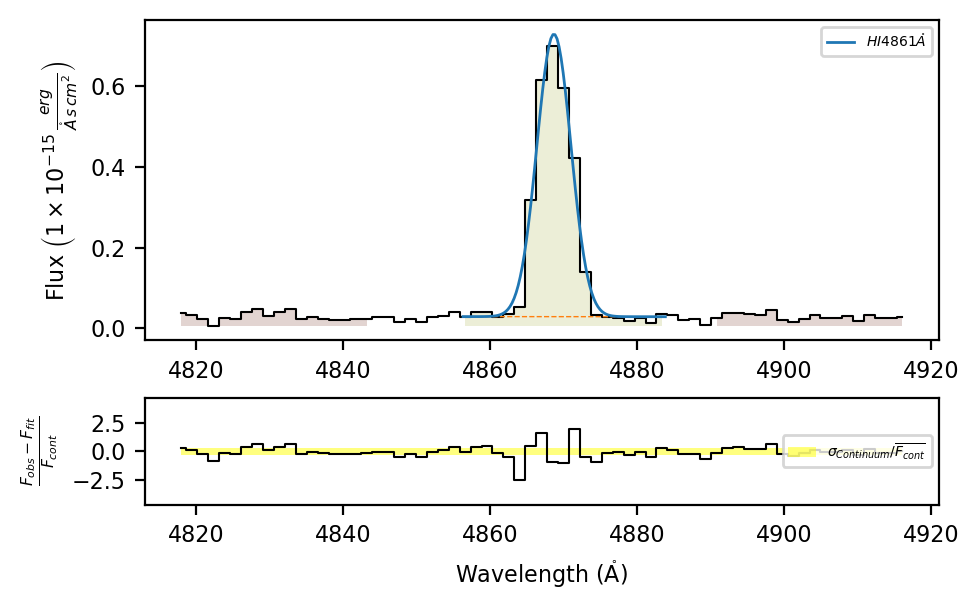

In [187]:
spec14.fit.bands('H1_4861A')
spec14.plot.bands(y_scale="linear")

In [188]:
spec14.fit.frame

<bound method SpecTreatment.frame of <lime.workflow.SpecTreatment object at 0x13c1006b0>>

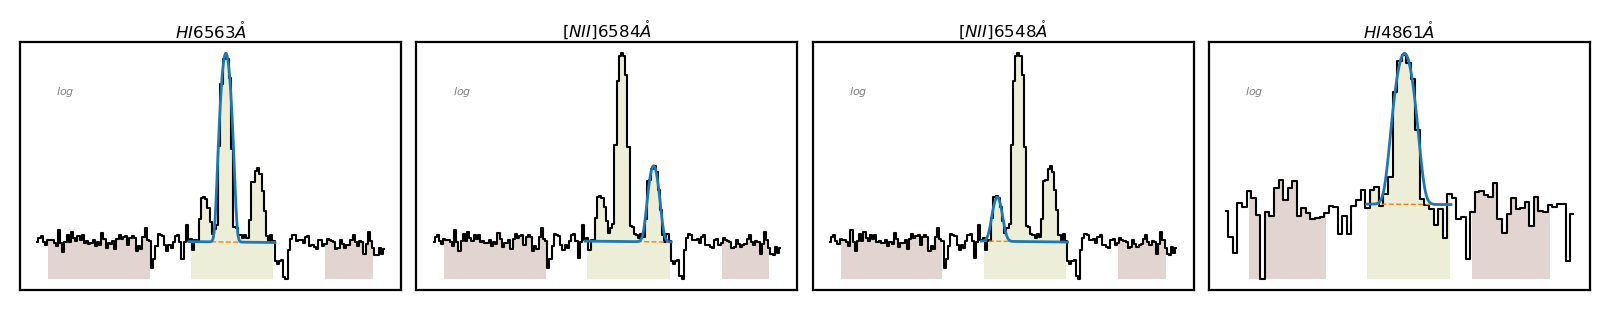

In [189]:
spec14.plot.grid()

In [200]:
spec14.save_frame('slit14_Hae_Hb.txt')

SLIT 16

In [201]:
hdul16 = fits.open('../../../reduccion/NGC1313/espectros_oficiales/slit16_1D.fits', mode='update')
header16 = hdul16[0].header
#header['BUNIT'] = '1e-15 erg / (Angstrom s cm2)'
header16['FLUXSCAL'] = 1
header16

hdul16.flush()

In [202]:
print(header16)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    1 / Number of axes                                 NAXIS1  =                 2696 / Axis length                                    EXTEND  =                    F / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        OBJECT  = 'NGC1313-FIELD2 MASK02_median_avsig' / Name of the object observed    DATE    = '2024-11-08T14:29:18' / Date FITS file was generated                  IRAF-TLM= '2024-11-08T14:29:18' / Time of last modification                     FIXPIX  = 'Sep 24 17:25 Bad pixel file is tmpbpm899t.pl'                        CTYPE1  = 'LINEAR  '           / R.A. in tangent plane projection               CRPIX1  =                   1. / Ref pix of axis 1                              CRVAL1  =     4033.59643554687 / RA at R

In [203]:
#now we specify the location and load the data
#address of NGC1313 spectrum (in this case, here)
fits_file16 = '../../../reduccion/NGC1313/espectros_oficiales/slit16_1D.fits'

#load the data
wave16, flux16, hdr16 = import_1313_fits(fits_file16)

In [204]:
spec16 = lime.Spectrum(wave16, flux16, redshift=z_obj, norm_flux=normFlux, units_flux='1e-15 * FLAM')

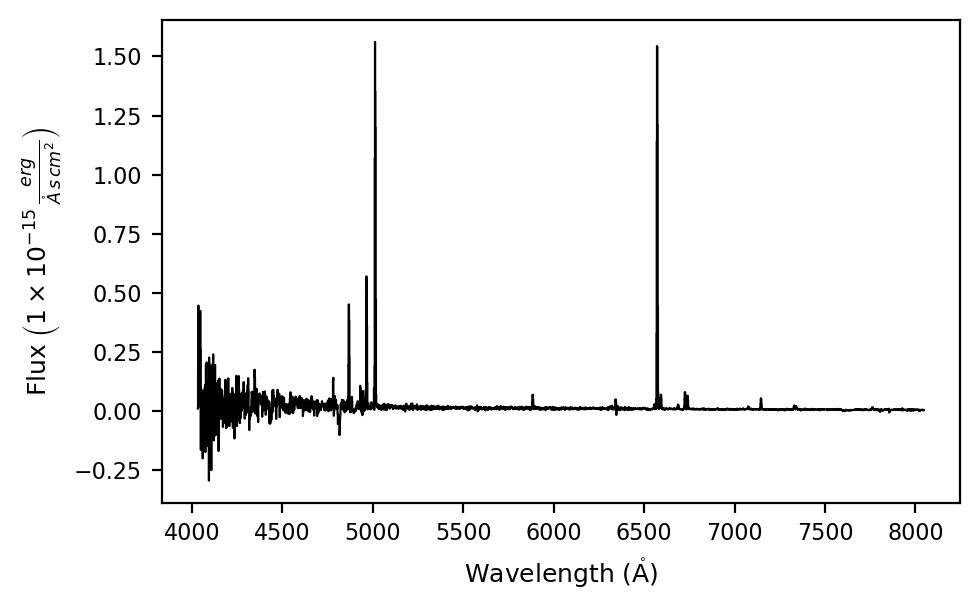

In [205]:
spec16.plot.spectrum(label='slit16_mask2_NGC1313')

In [207]:
# Line name, its location mask in the rest _frame and fit configuration
line16_Ha = 'H1_6563A_b'
band_edges16_Ha = np.array([6438.03, 6508.66, 6535.10, 6600.95, 6627.70, 6661.82])
fit_conf16_Ha = {'H1_6563A_b': 'H1_6563A+N2_6584A+N2_6548A',
            'N2_6548A_amp': {'expr': 'N2_6584A_amp/2.94'},
            'N2_6548A_kinem': 'N2_6584A'}

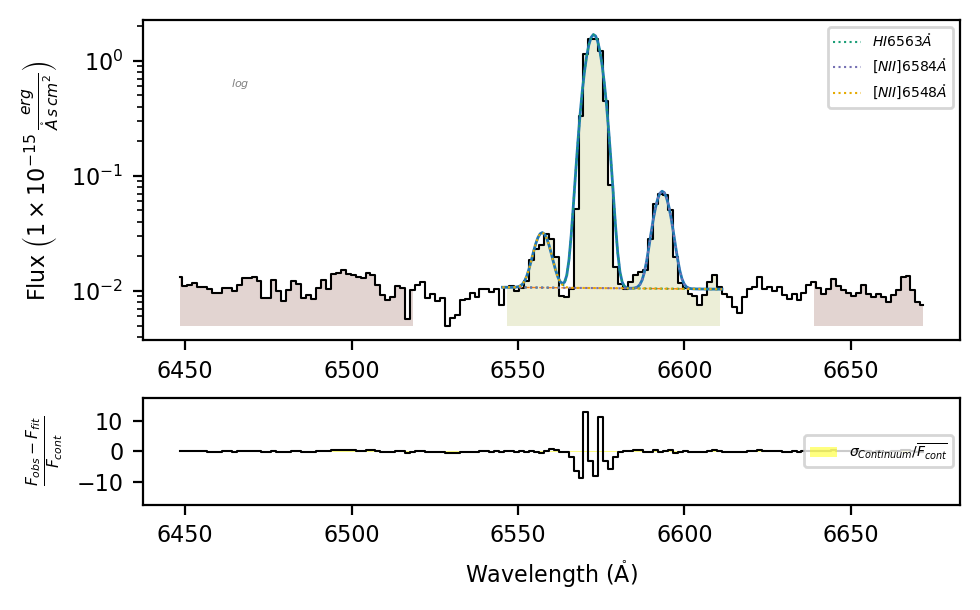

In [208]:
# New attempt including the fit configuration
spec16.fit.bands(line16_Ha, band_edges16_Ha, fit_conf=fit_conf16_Ha)
spec16.plot.bands()

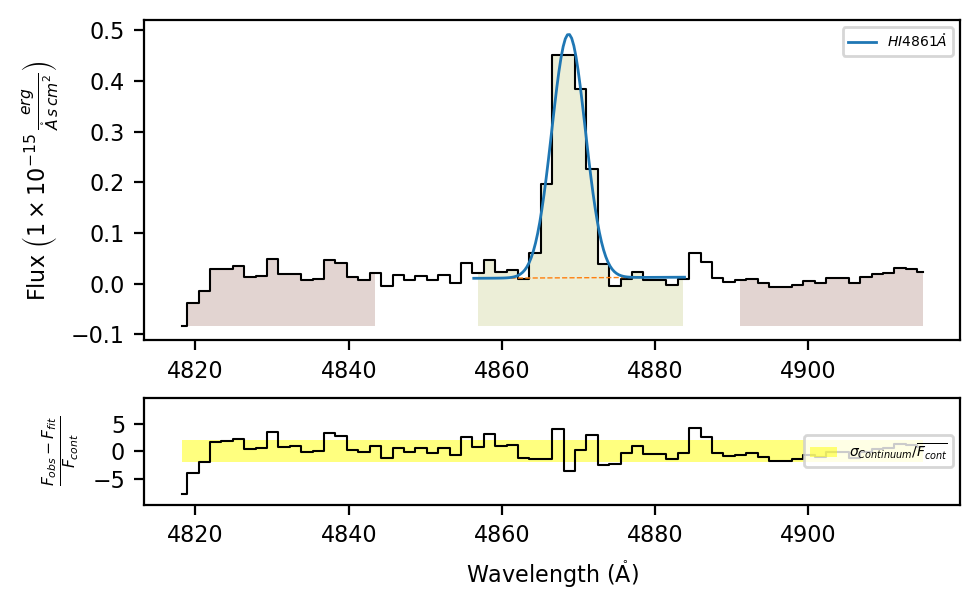

In [209]:
spec16.fit.bands('H1_4861A')
spec16.plot.bands()

In [210]:
spec16.fit.frame

<bound method SpecTreatment.frame of <lime.workflow.SpecTreatment object at 0x14241e990>>

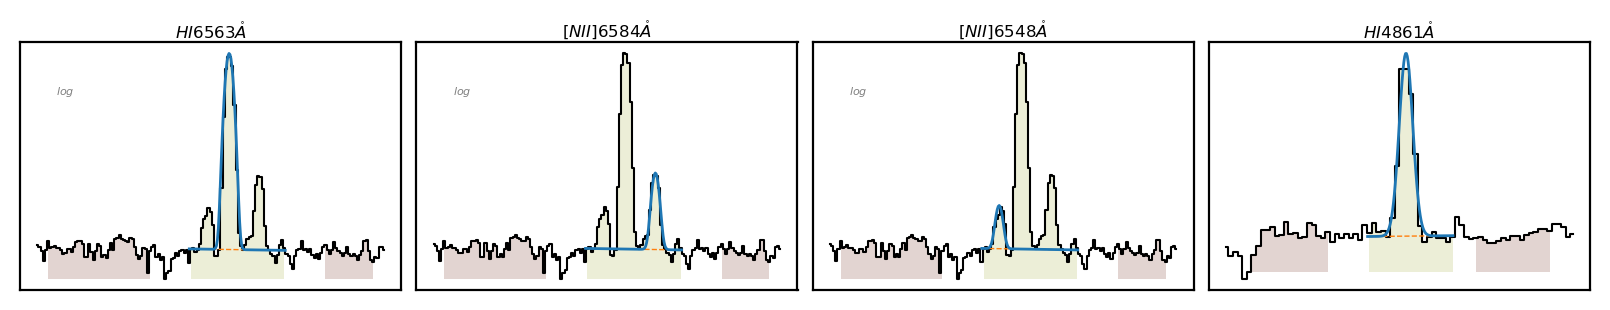

In [231]:
spec16.plot.grid()

In [211]:
spec16.save_frame('slit16_Hae_Hb.txt')

SLIT 21

In [212]:
hdul21_2 = fits.open('../../../reduccion/NGC1313/espectros_oficiales/slit21_mask2_1D.fits', mode='update')
header21_2 = hdul21_2[0].header
#header['BUNIT'] = '1e-15 erg / (Angstrom s cm2)'
header21_2['FLUXSCAL'] = 1
header21_2

hdul21_2.flush()

In [213]:
print(header21_2)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    1 / Number of axes                                 NAXIS1  =                 2829 / Axis length                                    EXTEND  =                    F / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        OBJECT  = 'NGC1313-FIELD2 MASK02_median_avsig' / Name of the object observed    DATE    = '2024-11-08T14:29:27' / Date FITS file was generated                  IRAF-TLM= '2024-11-08T14:29:27' / Time of last modification                     FIXPIX  = 'Sep 24 17:25 Bad pixel file is tmpbpm899t.pl'                        CTYPE1  = 'LINEAR  '           / R.A. in tangent plane projection               CRPIX1  =                   1. / Ref pix of axis 1                              CRVAL1  =      4036.4033203125 / RA at R

In [219]:
#now we specify the location and load the data
#address of NGC1313 spectrum (in this case, here)
fits_file21_2 = '../../../reduccion/NGC1313/espectros_oficiales/slit21_mask2_1D.fits'

#load the data
wave21_2, flux21_2, hdr21_2 = import_1313_fits(fits_file21_2)

In [220]:
spec21_2 = lime.Spectrum(wave21_2, flux21_2, redshift=z_obj, norm_flux=normFlux, units_flux='1e-15 * FLAM')

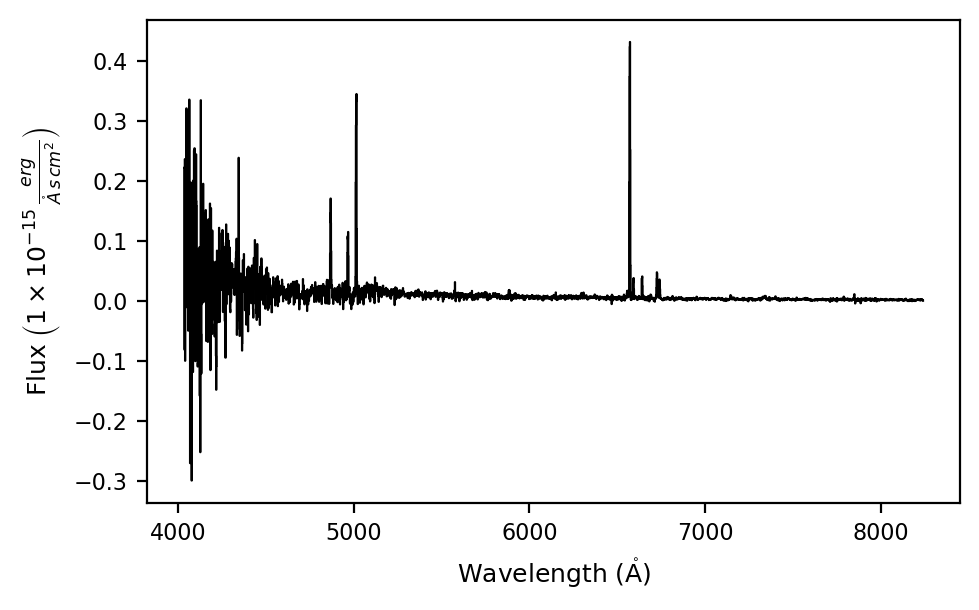

In [221]:
spec21_2.plot.spectrum(label='slit21_mask2_NGC1313')

In [227]:
# Line name, its location mask in the rest _frame and fit configuration
line21_2_Ha = 'H1_6563A_b'
band_edges21_2_Ha = np.array([6438.03, 6508.66, 6535.10, 6600.95, 6634, 6661.82])
fit_conf21_2_Ha = {'H1_6563A_b': 'H1_6563A+N2_6584A+N2_6548A',
            'N2_6548A_amp': {'expr': 'N2_6584A_amp/2.94'},
            'N2_6548A_kinem': 'N2_6584A'}

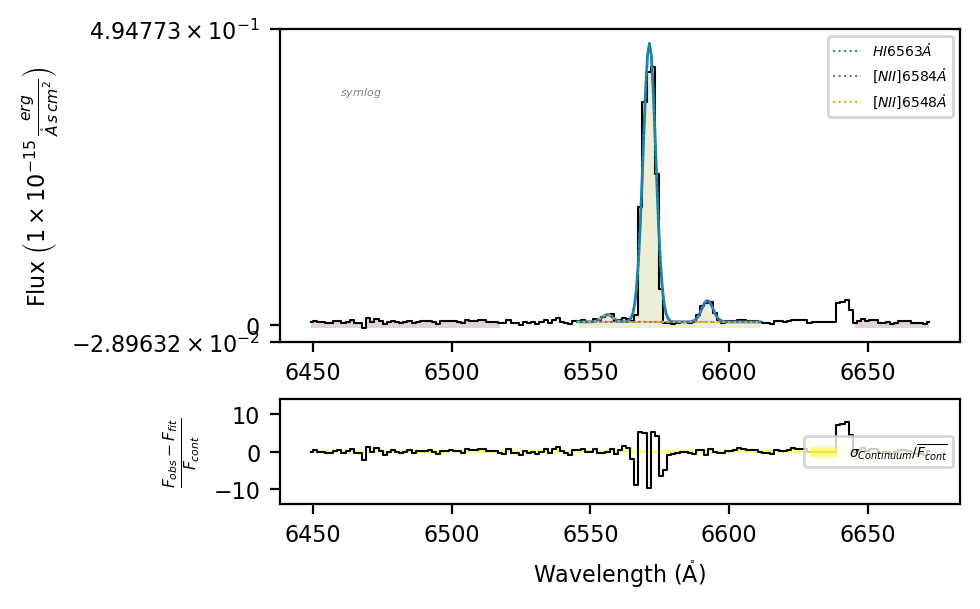

In [228]:
# New attempt including the fit configuration
spec21_2.fit.bands(line21_2_Ha, band_edges21_2_Ha, fit_conf=fit_conf21_2_Ha)
spec21_2.plot.bands()

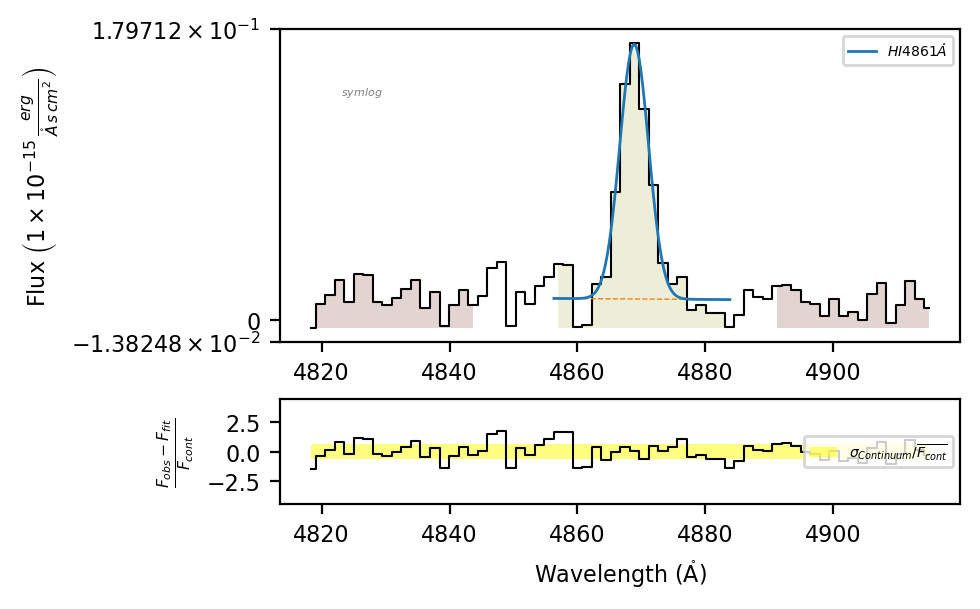

In [229]:
spec21_2.fit.bands('H1_4861A')
spec21_2.plot.bands()

In [230]:
spec21_2.fit.frame

<bound method SpecTreatment.frame of <lime.workflow.SpecTreatment object at 0x143be3710>>

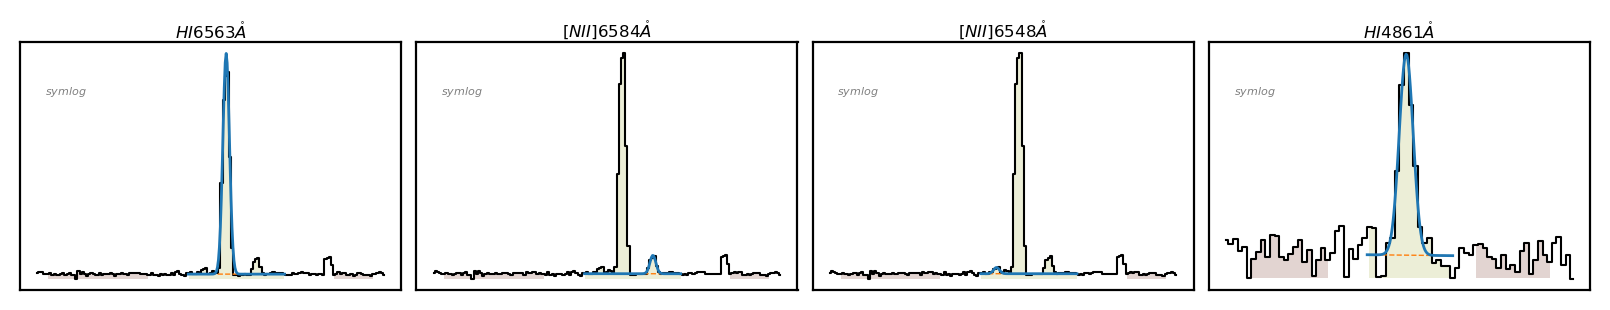

In [232]:
spec21_2.plot.grid()

In [233]:
spec21_2.save_frame('slit21_2_Hae_Hb.txt')

SLIT 23

In [234]:
hdul23_2 = fits.open('../../../reduccion/NGC1313/espectros_oficiales/slit23_mask2_1D.fits', mode='update')
header23_2 = hdul23_2[0].header
#header['BUNIT'] = '1e-15 erg / (Angstrom s cm2)'
header23_2['FLUXSCAL'] = 1
header23_2

hdul23_2.flush()

In [235]:
print(header23_2)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    1 / Number of axes                                 NAXIS1  =                 3184 / Axis length                                    EXTEND  =                    F / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        OBJECT  = 'NGC1313-FIELD2 MASK02_median_avsig' / Name of the object observed    DATE    = '2024-11-08T14:29:42' / Date FITS file was generated                  IRAF-TLM= '2024-11-08T14:29:42' / Time of last modification                     FIXPIX  = 'Sep 24 17:25 Bad pixel file is tmpbpm899t.pl'                        CTYPE1  = 'LINEAR  '           / R.A. in tangent plane projection               CRPIX1  =                   1. / Ref pix of axis 1                              CRVAL1  =     4040.19873046875 / RA at R

In [236]:
#now we specify the location and load the data
#address of NGC1313 spectrum (in this case, here)
fits_file23_2 = '../../../reduccion/NGC1313/espectros_oficiales/slit23_mask2_1D.fits'

#load the data
wave23_2, flux23_2, hdr23_2 = import_1313_fits(fits_file23_2)

In [237]:
spec23_2 = lime.Spectrum(wave23_2, flux23_2, redshift=z_obj, norm_flux=normFlux, units_flux='1e-15 * FLAM')

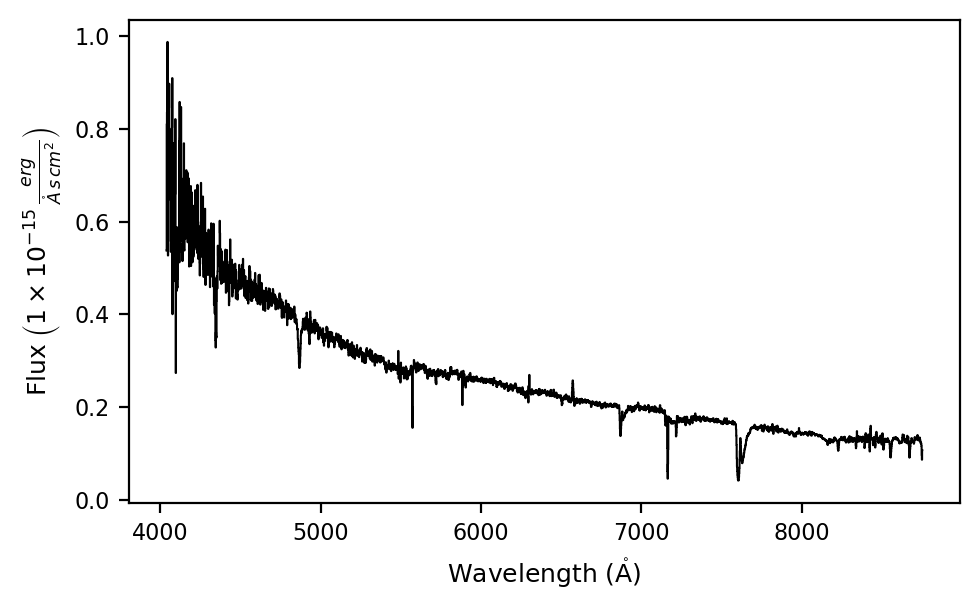

In [238]:
spec23_2.plot.spectrum(label='slit23_mask2_NGC1313')

SLIT 25

In [6]:
hdul25 = fits.open('../../../reduccion/NGC1313/espectros_oficiales/slit25_1D.fits', mode='update')
header25 = hdul25[0].header
#header['BUNIT'] = '1e-15 erg / (Angstrom s cm2)'
header25['FLUXSCAL'] = 1
header25

hdul25.flush()

In [7]:
print(header25)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    1 / Number of axes                                 NAXIS1  =                 2590 / Axis length                                    EXTEND  =                    F / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        OBJECT  = 'NGC1313-FIELD2 MASK02_median_avsig' / Name of the object observed    DATE    = '2024-11-08T14:29:48' / Date FITS file was generated                  IRAF-TLM= '2024-11-08T14:29:48' / Time of last modification                     FIXPIX  = 'Sep 24 17:25 Bad pixel file is tmpbpm899t.pl'                        CTYPE1  = 'LINEAR  '           / R.A. in tangent plane projection               CRPIX1  =                   1. / Ref pix of axis 1                              CRVAL1  =     4030.51049804688 / RA at R

In [8]:
#now we specify the location and load the data
#address of NGC1313 spectrum (in this case, here)
fits_file25 = '../../../reduccion/NGC1313/espectros_oficiales/slit25_1D.fits'

#load the data
wave25, flux25, hdr25 = import_1313_fits(fits_file25)

In [9]:
spec25 = lime.Spectrum(wave25, flux25, redshift=z_obj, norm_flux=normFlux, units_flux='1e-15 * FLAM')

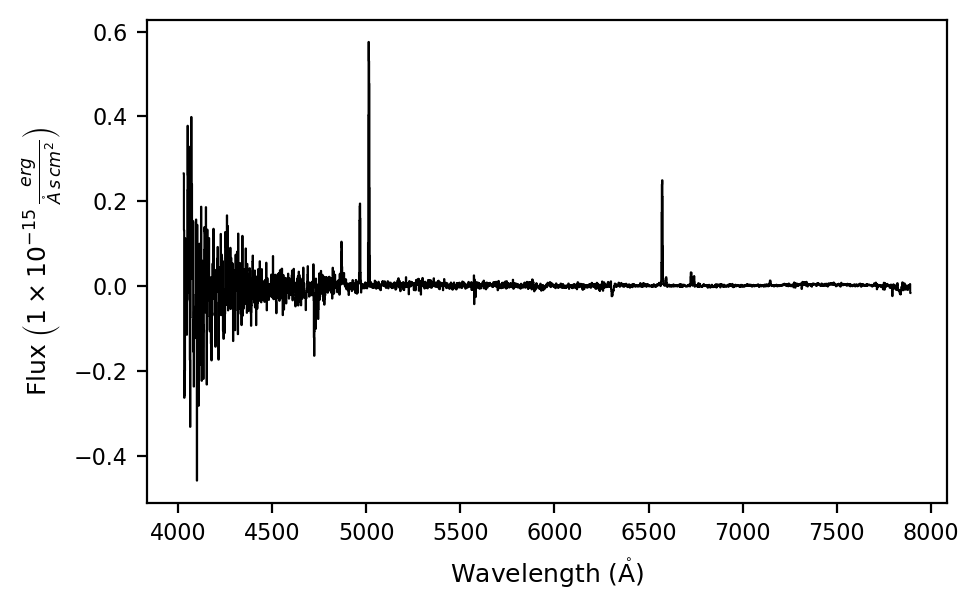

In [10]:
spec25.plot.spectrum(label='slit25_mask2_NGC1313')

In [11]:
# Line name, its location mask in the rest _frame and fit configuration
line25_Ha = 'H1_6563A_b'
band_edges25_Ha = np.array([6438.03, 6508.66, 6535.10, 6600.95, 6634, 6661.82])
fit_conf25_Ha = {'H1_6563A_b': 'H1_6563A+N2_6584A+N2_6548A',
            'N2_6548A_amp': {'expr': 'N2_6584A_amp/2.94'},
            'N2_6548A_kinem': 'N2_6584A'}

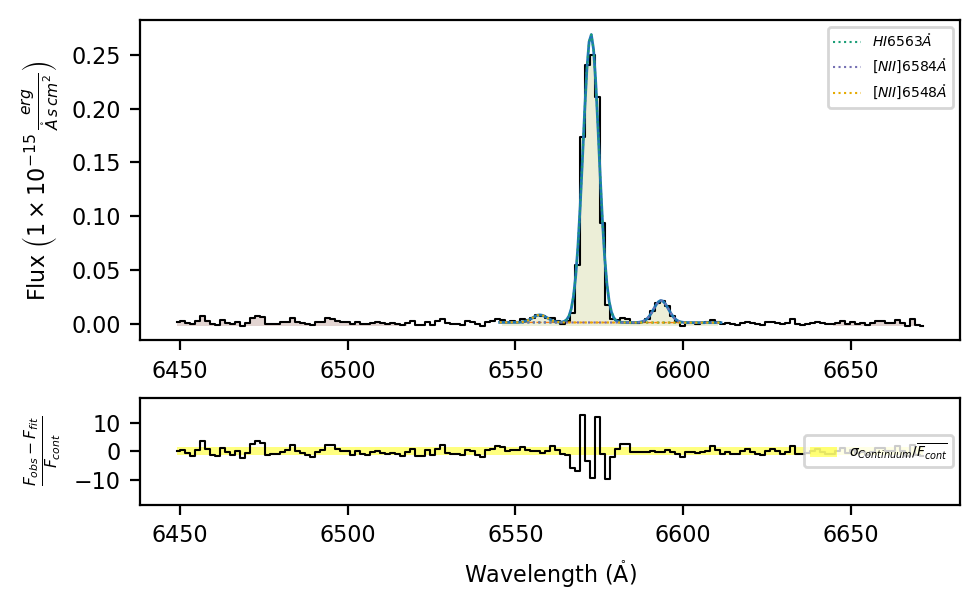

In [12]:
# New attempt including the fit configuration
spec25.fit.bands(line25_Ha, band_edges25_Ha, fit_conf=fit_conf25_Ha)
spec25.plot.bands(y_scale="linear")

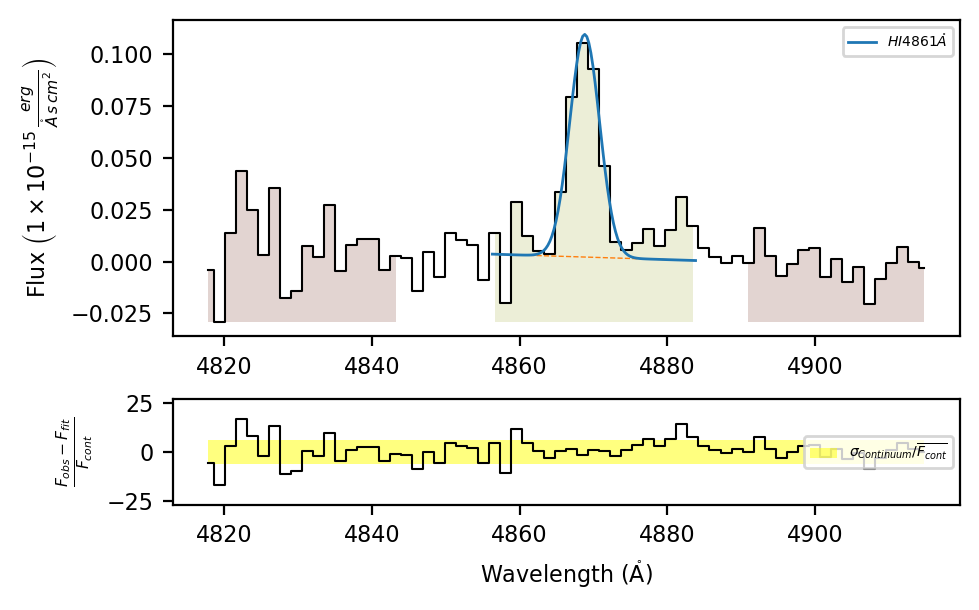

In [13]:
spec25.fit.bands('H1_4861A')
spec25.plot.bands()

In [14]:
spec25.fit.frame

<bound method SpecTreatment.frame of <lime.workflow.SpecTreatment object at 0x133470920>>

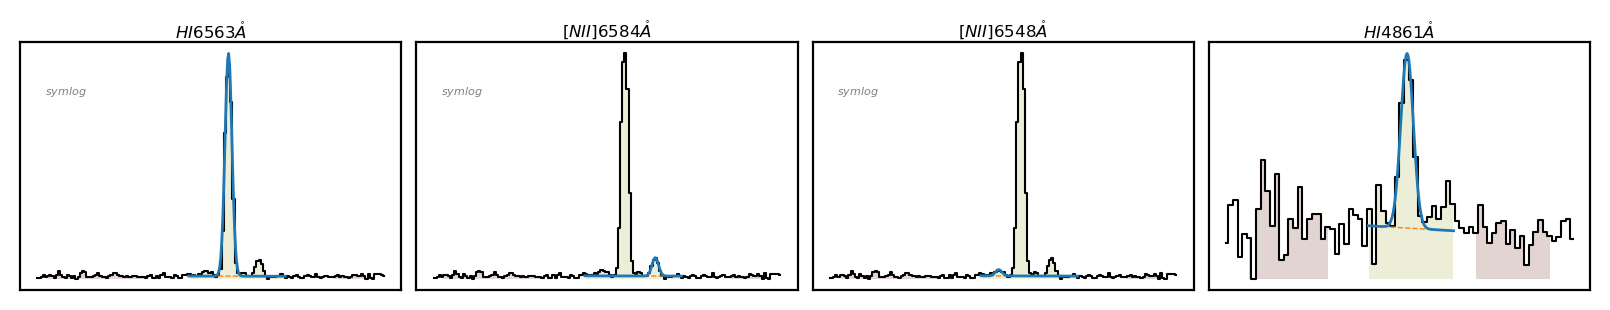

In [15]:
spec25.plot.grid()

In [16]:
spec25.save_frame('slit25_Hae_Hb.txt')

SLIT 27

In [17]:
hdul27 = fits.open('../../../reduccion/NGC1313/espectros_oficiales/slit27_1D.fits', mode='update')
header27 = hdul27[0].header
#header['BUNIT'] = '1e-15 erg / (Angstrom s cm2)'
header27['FLUXSCAL'] = 1
header27

hdul27.flush()

In [18]:
print(header27)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    1 / Number of axes                                 NAXIS1  =                 2699 / Axis length                                    EXTEND  =                    F / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        OBJECT  = 'NGC1313-FIELD2 MASK02_median_avsig' / Name of the object observed    DATE    = '2024-11-08T14:29:53' / Date FITS file was generated                  IRAF-TLM= '2024-11-08T14:29:53' / Time of last modification                     FIXPIX  = 'Sep 24 17:25 Bad pixel file is tmpbpm899t.pl'                        CTYPE1  = 'LINEAR  '           / R.A. in tangent plane projection               CRPIX1  =                   1. / Ref pix of axis 1                              CRVAL1  =     4032.66870117188 / RA at R

In [19]:
#now we specify the location and load the data
#address of NGC1313 spectrum (in this case, here)
fits_file27 = '../../../reduccion/NGC1313/espectros_oficiales/slit27_1D.fits'

#load the data
wave27, flux27, hdr27 = import_1313_fits(fits_file27)

In [20]:
spec27 = lime.Spectrum(wave27, flux27, redshift=z_obj, norm_flux=normFlux, units_flux='1e-15 * FLAM')

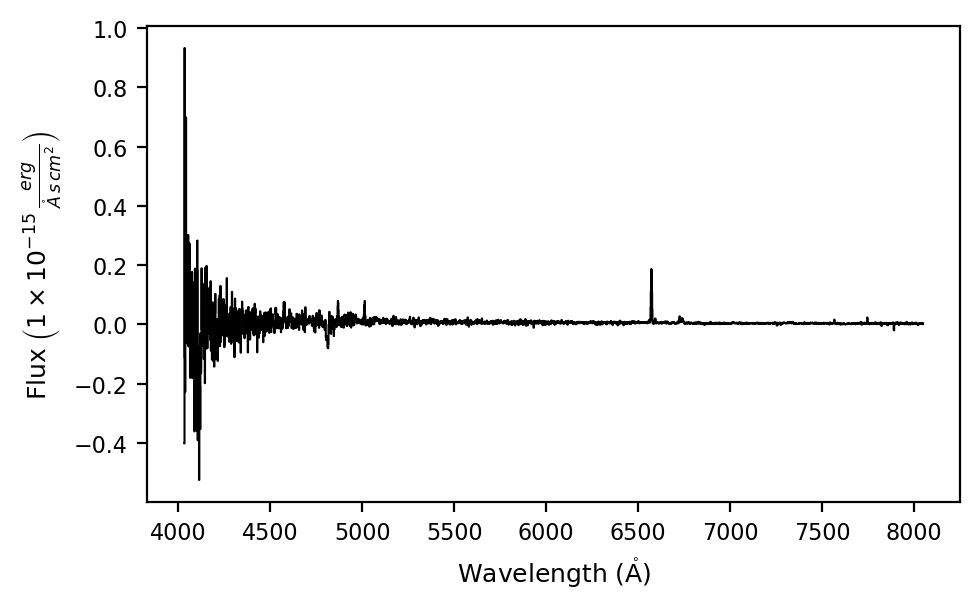

In [21]:
spec27.plot.spectrum(label='slit27_mask2_NGC1313')

In [22]:
# Line name, its location mask in the rest _frame and fit configuration
line27_Ha = 'H1_6563A_b'
band_edges27_Ha = np.array([6438.03, 6508.66, 6535.10, 6600.95, 6627.70, 6661.82])
fit_conf27_Ha = {'H1_6563A_b': 'H1_6563A+N2_6584A+N2_6548A',
            'N2_6548A_amp': {'expr': 'N2_6584A_amp/2.94'},
            'N2_6548A_kinem': 'N2_6584A'}

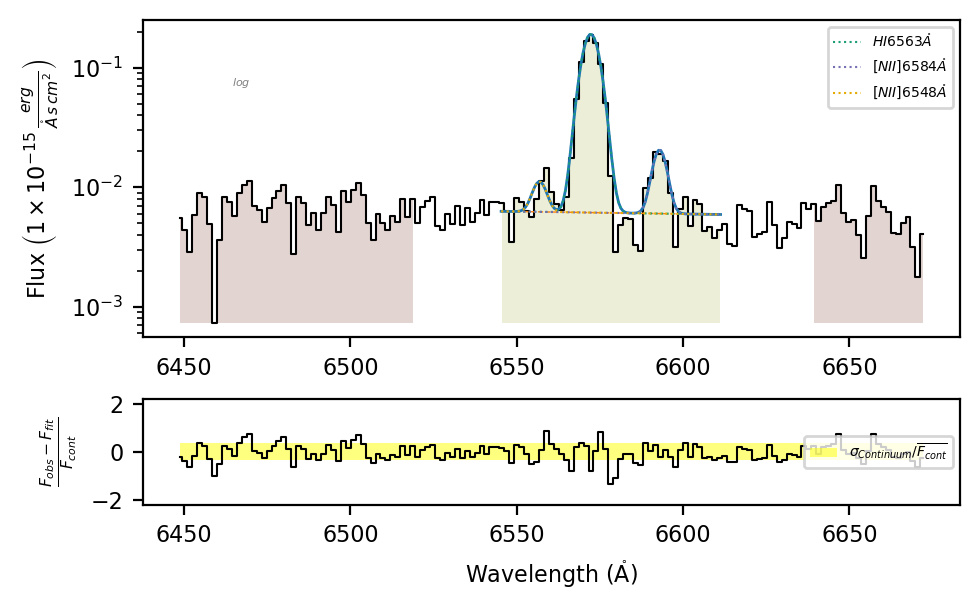

In [25]:
# New attempt including the fit configuration
spec27.fit.bands(line27_Ha, band_edges27_Ha, fit_conf=fit_conf27_Ha)
spec27.plot.bands()

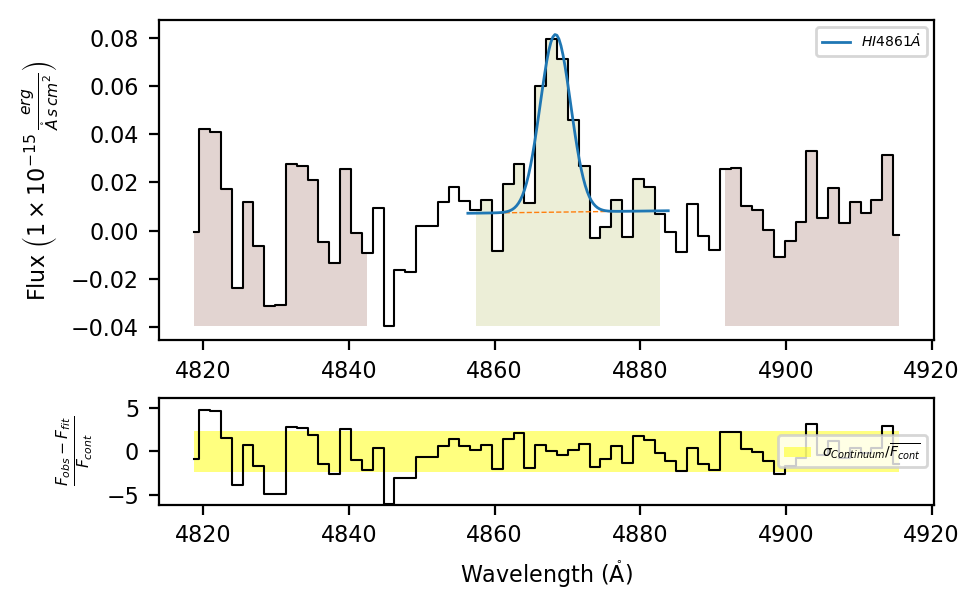

In [26]:
spec27.fit.bands('H1_4861A')
spec27.plot.bands()

In [27]:
spec27.fit.frame

<bound method SpecTreatment.frame of <lime.workflow.SpecTreatment object at 0x1347f25a0>>

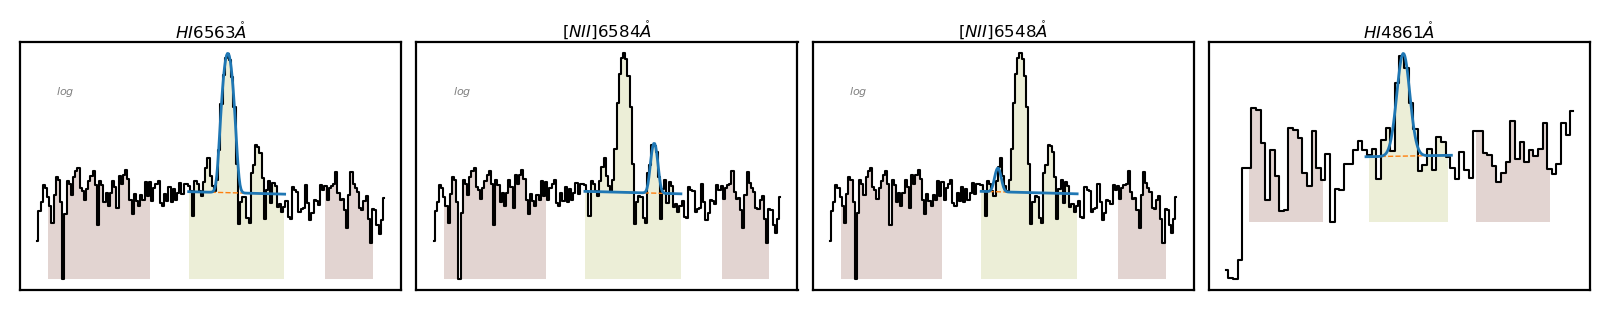

In [28]:
spec27.plot.grid()

In [29]:
spec27.save_frame('slit27_Hae_Hb.txt')